In [365]:
import pandas as pd # type:ignore
import numpy as np # type:ignore
import matplotlib.pyplot as plt # type:ignore
import seaborn as sns # type:ignore
from sklearn.datasets import make_blobs # type:ignore
from scipy.stats import multivariate_normal # type:ignore
from sklearn.metrics import confusion_matrix,classification_report # type:ignore
from scipy.optimize import linear_sum_assignment # type:ignore
from matplotlib.lines import Line2D # type:ignore
from sklearn.preprocessing import StandardScaler # type:ignore
from sklearn.decomposition import PCA # type:ignore
from sklearn.manifold import TSNE # type:ignore
import umap # type:ignore
from sklearn.cluster import KMeans,DBSCAN # type:ignore
from sklearn.mixture import GaussianMixture # type:ignore
from sklearn.neighbors import NearestNeighbors # type:ignore
import kmedoids # type:ignore
from pyclustering.cluster.kmedoids import kmedoids # type:ignore
from pyclustering.utils import distance_metric,type_metric # type:ignore
import warnings # type:ignore
warnings.filterwarnings("ignore", category=UserWarning) # type:ignore
from main import CorrelatedClusterGenerator

# data

In [366]:
np.random.seed(42)

In [369]:
cluster_generator = CorrelatedClusterGenerator(n_samples=1000,n_features=10,n_clusters=3,correlation=0.4,random_state=42)

In [370]:
X, y = cluster_generator.generate_clusters()

In [371]:
X = X + np.random.normal(scale=3,size=X.shape) 

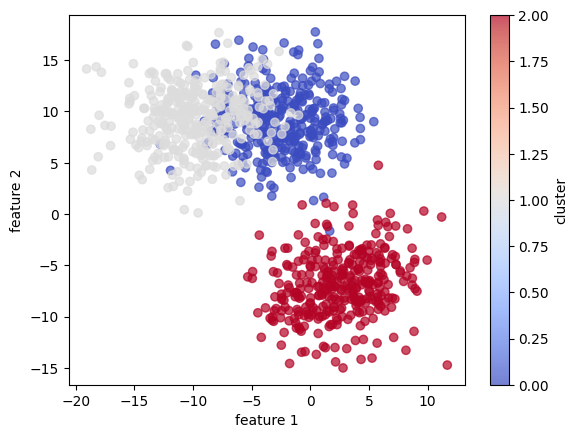

In [372]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='coolwarm',alpha=0.7)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.colorbar(label="cluster")
plt.show()

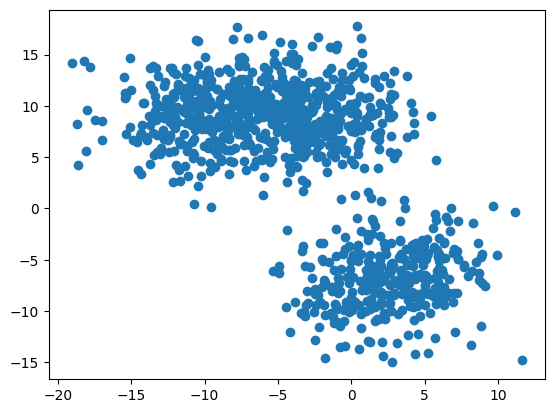

In [6]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [7]:
corr_dataset = pd.DataFrame(X) 

In [8]:
corr_dataset.columns = [f"vab_{col+1}" for col in corr_dataset.columns]

In [9]:
corr_dataset['target'] = y

In [10]:
corr_dataset

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  
0    4.323220  2.585761  5.065556       0  
1    6.353955  0.137074  7.170266       0  
2    8.187964 -0.746995  9.100161       0  
3    8.011795 -2.707305  4.126568       0  
4    5.900886  3.439981  9.536965       0  
..        ...       ...       ...     ...  
994  7.519724  0.239838 -9.269743       2  
995  0.480927  3.353072 -8.839961       2  
996 -6.534461  7.378898 -5.463060       2  
997  2.309382  5.359316 -9.237454       2  
998 -0.950249  4.205124 -8.835577       2  

[999 rows x 11 columns]

In [11]:
# sns.pairplot(corr_dataset)

## correlation matrix

In [12]:
corr_dataset.iloc[:,:-1].corr()

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
vab_1   1.000000 -0.620159 -0.614583  0.305082  0.420553  0.593800 -0.239063   
vab_2  -0.620159  1.000000  0.777903  0.076148 -0.584576 -0.805851  0.019767   
vab_3  -0.614583  0.777903  1.000000 -0.017910 -0.507136 -0.710685  0.097921   
vab_4   0.305082  0.076148 -0.017910  1.000000 -0.086661 -0.115414 -0.373609   
vab_5   0.420553 -0.584576 -0.507136 -0.086661  1.000000  0.571428  0.040707   
vab_6   0.593800 -0.805851 -0.710685 -0.115414  0.571428  1.000000  0.043463   
vab_7  -0.239063  0.019767  0.097921 -0.373609  0.040707  0.043463  1.000000   
vab_8   0.057942  0.337789  0.209543  0.493227 -0.258629 -0.352467 -0.349635   
vab_9   0.360175 -0.183496 -0.224069  0.267156  0.094638  0.192833 -0.222361   
vab_10 -0.172621  0.627995  0.476442  0.460577 -0.446974 -0.619260 -0.299321   

           vab_8     vab_9    vab_10  
vab_1   0.057942  0.360175 -0.172621  
vab_2   0.337789 -0.183496  0.627995  
vab_3   0.209543 -0.224069  0.476442  
vab_4   0.493227  0.267156  0.460577  
vab_5  -0.258629  0.094638 -0.446974  
vab_6  -0.352467  0.192833 -0.619260  
vab_7  -0.349635 -0.222361 -0.299321  
vab_8   1.000000  0.155870  0.606719  
vab_9   0.155870  1.000000  0.072860  
vab_10  0.606719  0.072860  1.000000

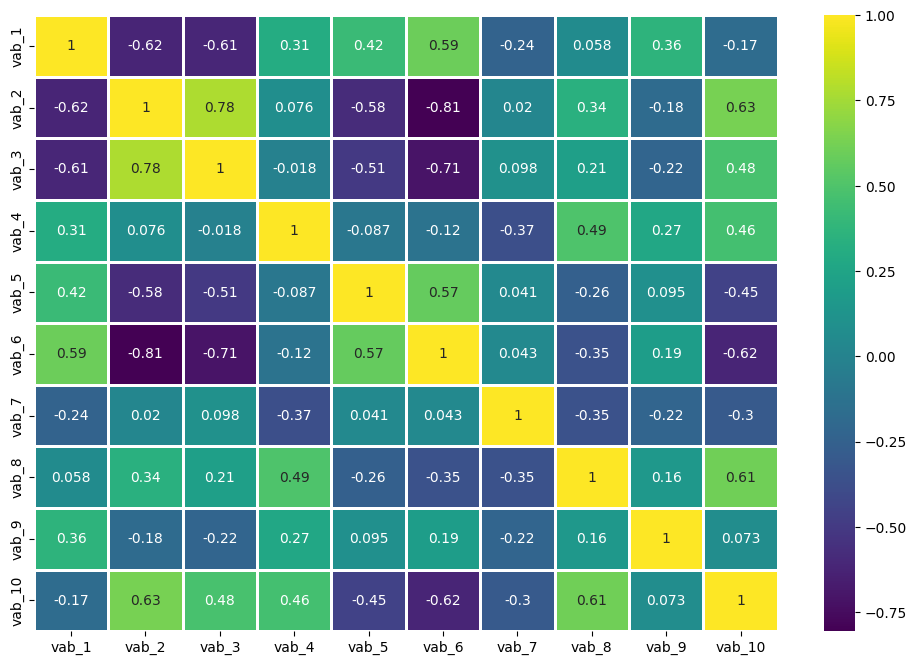

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_dataset.iloc[:,:-1].corr(),cmap='viridis',annot=True,linewidths=1)
plt.show()

## data standardization

In [14]:
X_values = corr_dataset.iloc[:,:-1].values

In [15]:
y_values = corr_dataset.iloc[:,-1].values

In [16]:
scaler = StandardScaler()

In [17]:
X_values = scaler.fit_transform(X_values)

In [18]:
np.mean(X_values),np.std(X_values)

(-3.229093113464319e-16, 1.0)

In [19]:
pd.DataFrame(X_values)

0         1         2         3         4         5         6  \
0    0.962298  0.618205  0.883332 -0.147610  0.312991 -0.081851 -2.516295   
1   -0.309768  0.493297 -0.087198  0.966782  0.651286 -0.834331  0.130238   
2    0.258630  0.806743 -0.525341  0.258538 -0.057735 -0.746256 -1.827989   
3    0.974304  1.026685  1.102941  1.029784 -0.351375  0.160123 -0.351258   
4    0.376782  0.909077  0.402601  0.585703 -1.753653 -0.875602 -1.301340   
..        ...       ...       ...       ...       ...       ...       ...   
994  0.365199 -1.450327 -1.147399  0.504977  1.767396  0.937854 -0.837713   
995  0.523954 -1.181966 -0.787499 -0.097525  1.907793  0.832557 -0.225090   
996  0.338206 -1.192086 -1.110135 -0.300522  1.046106  0.844390 -0.779326   
997  1.173466 -1.500285 -2.497624 -0.334663  1.296958  1.788650  0.362201   
998  1.472792 -1.509994 -1.559474 -0.673280  0.219033  1.595792 -0.458292   

            7         8         9  
0    0.387535  0.463005  1.280156  
1    0.846680 -0.219350  1.613322  
2    1.261345 -0.465706  1.918815  
3    1.221514 -1.011969  1.131518  
4    0.744242  0.701044  1.987959  
..        ...       ...       ...  
994  1.110258 -0.190713 -0.989055  
995 -0.481200  0.676825 -0.921022  
996 -2.067364  1.798669 -0.386475  
997 -0.067790  1.235889 -0.983944  
998 -0.804786  0.914260 -0.920328  

[999 rows x 10 columns]

<Axes: ylabel='Density'>

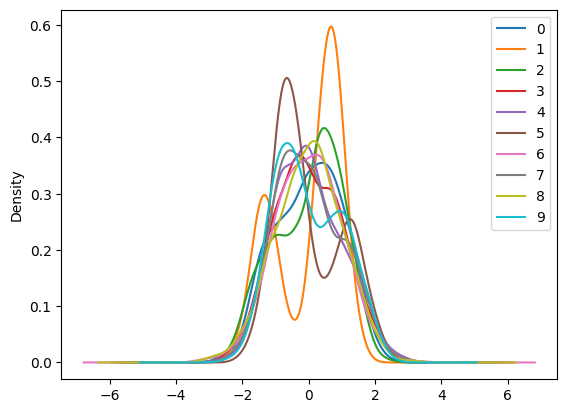

In [20]:
pd.DataFrame(X_values).plot(kind='density')

## pca 

In [21]:
pca_general = PCA()

In [22]:
pca_general.fit(X_values)

PCA()

In [23]:
explained_variance = pca_general.explained_variance_ratio_

In [24]:
explained_variance

array([0.41292128, 0.24091025, 0.07698378, 0.06711523, 0.0543439 ,
       0.04583992, 0.03359854, 0.02937759, 0.0221812 , 0.01672829])

In [25]:
eigenvalues = pca_general.explained_variance_

In [26]:
pd.DataFrame(eigenvalues)

0
0  4.133350
1  2.411516
2  0.770609
3  0.671825
4  0.543984
5  0.458859
6  0.336322
7  0.294070
8  0.222034
9  0.167450

In [27]:
eigenvectors = pca_general.components_

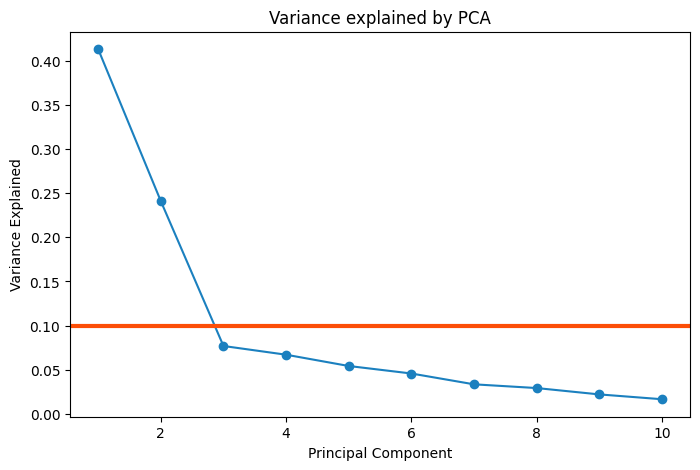

In [28]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [29]:
pca = PCA(n_components=2)

In [30]:
principal_components = pca.fit_transform(X_values)

In [31]:
pd.DataFrame(principal_components).head(8)

0         1
0  0.853736  1.907922
1  1.321186  1.037512
2  1.553750  1.950093
3  1.566725  1.278760
4  2.394870  1.971801
5  1.992102  1.661441
6  1.542473  0.696710
7  2.209381  2.479802

In [32]:
principal_df = pd.DataFrame(data = principal_components,columns = ['principal component 1','principal component 2'])

In [33]:
final_df = pd.concat([principal_df,corr_dataset[['target']]],axis = 1)

In [34]:
final_df

principal component 1  principal component 2  target
0                 0.853736               1.907922       0
1                 1.321186               1.037512       0
2                 1.553750               1.950093       0
3                 1.566725               1.278760       0
4                 2.394870               1.971801       0
..                     ...                    ...     ...
994              -2.285279               1.184977       2
995              -2.580149               0.272585       2
996              -2.644341               0.280732       2
997              -3.861888               0.805672       2
998              -3.230921               0.527046       2

[999 rows x 3 columns]

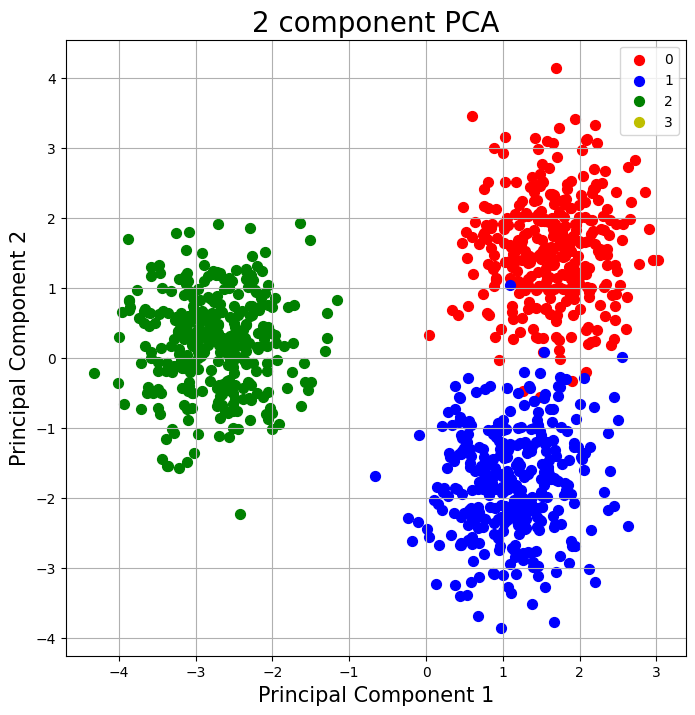

In [35]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

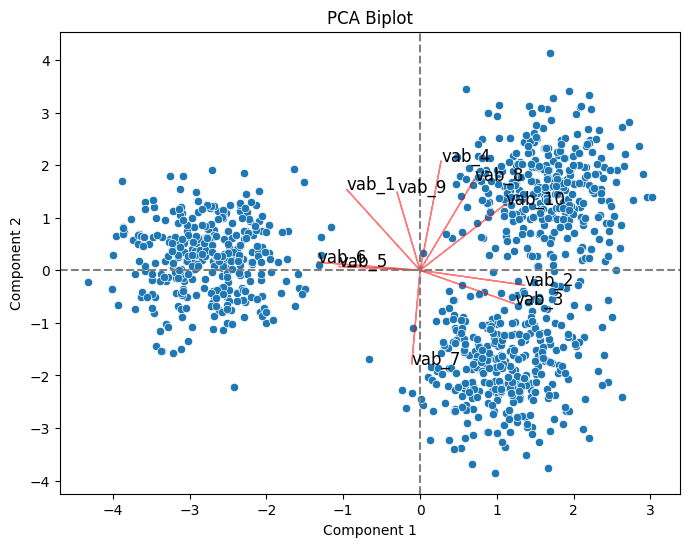

In [36]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(corr_dataset.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

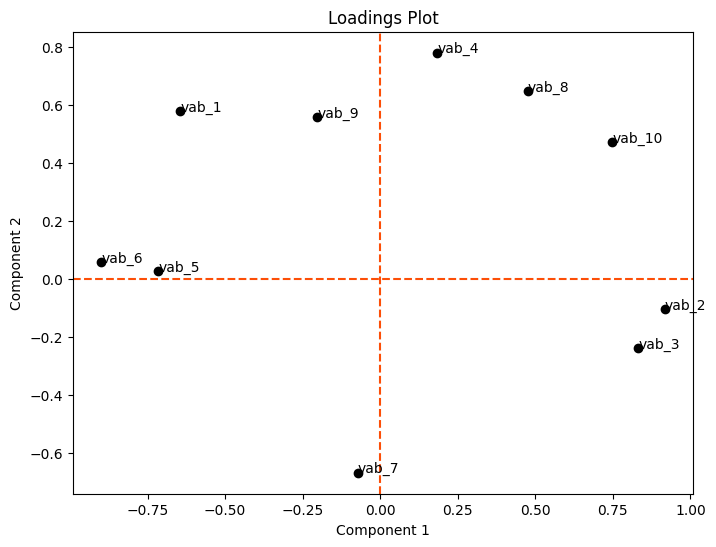

In [37]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(corr_dataset.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

In [38]:
X_pca = pca.transform(X_values)

In [39]:
pd.DataFrame(X_pca).head()

0         1
0  0.853736  1.907922
1  1.321186  1.037512
2  1.553750  1.950093
3  1.566725  1.278760
4  2.394870  1.971801

## t-SNE

In [40]:
tsne = TSNE(n_components=2,random_state=42)

In [41]:
X_tsne = tsne.fit_transform(X_values)

In [42]:
tsne_data = pd.concat([pd.DataFrame(X_tsne,columns=('dim_1','dim_2')),corr_dataset['target']],axis=1)

In [43]:
tsne_data

dim_1      dim_2  target
0    15.090537  27.097599       0
1    24.581364   3.501484       0
2     8.440258  17.908827       0
3     5.804614  11.332616       0
4    19.197611  15.949972       0
..         ...        ...     ...
994 -50.272530   1.303641       2
995 -30.842312   5.831394       2
996 -35.993385  15.106030       2
997 -32.439354  11.349795       2
998 -39.240524   8.766665       2

[999 rows x 3 columns]

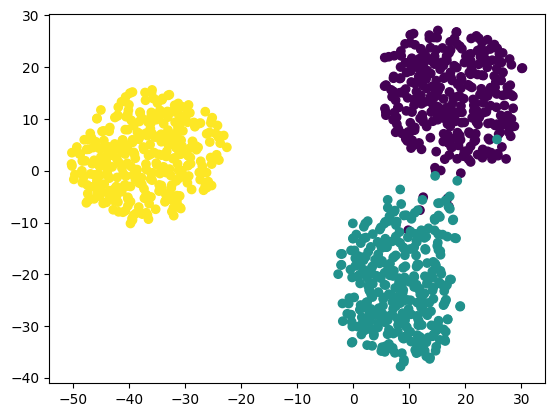

In [44]:
plt.scatter(x=tsne_data['dim_1'],y=tsne_data['dim_2'],c=tsne_data['target'])
plt.show()

In [45]:
tsne.kl_divergence_

1.255868911743164

## umap

In [46]:
umap = umap.UMAP(random_state=42)

In [47]:
X_umap = umap.fit_transform(X_values)

In [48]:
umap_data = pd.concat([pd.DataFrame(X_umap,columns=('dim_1','dim_2')),corr_dataset['target']],axis=1)

In [49]:
umap_data

dim_1     dim_2  target
0    -3.382987  8.808718       0
1    -2.672431  6.359131       0
2    -4.278051  8.164650       0
3    -4.643204  7.395157       0
4    -3.258890  7.497914       0
..         ...       ...     ...
994  11.180391  2.249427       2
995  11.226160  3.744162       2
996  12.372746  3.990183       2
997  12.444189  3.989391       2
998  12.384456  3.320195       2

[999 rows x 3 columns]

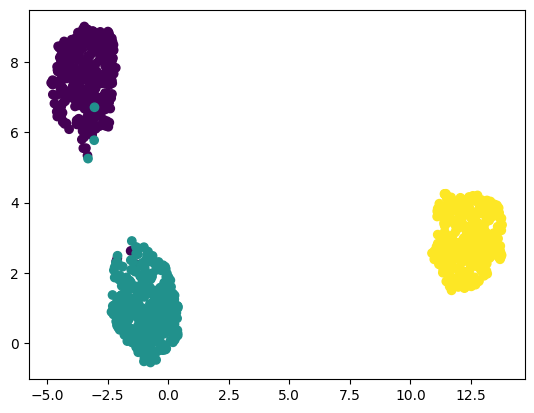

In [50]:
plt.scatter(umap_data['dim_1'],umap_data['dim_2'],c=umap_data['target'])
plt.show()

## k-means 

In [51]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42)

In [52]:
kmeans.fit(X_values)

KMeans(n_clusters=3, random_state=42)

In [53]:
df_kmeans = corr_dataset.copy()

In [54]:
df_kmeans['k_means'] = kmeans.labels_

In [55]:
df_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  k_means  
0    4.323220  2.585761  5.065556       0        2  
1    6.353955  0.137074  7.170266       0        2  
2    8.187964 -0.746995  9.100161       0        2  
3    8.011795 -2.707305  4.126568       0        2  
4    5.900886  3.439981  9.536965       0        2  
..        ...       ...       ...     ...      ...  
994  7.519724  0.239838 -9.269743       2        1  
995  0.480927  3.353072 -8.839961       2        1  
996 -6.534461  7.378898 -5.463060       2        1  
997  2.309382  5.359316 -9.237454       2        1  
998 -0.950249  4.205124 -8.835577       2        1  

[999 rows x 12 columns]

In [56]:
y_true = df_kmeans['target'].values  
y_kmeans = df_kmeans['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_kmeans['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_kmeans['k_means'] == y_true))

accuracy before: 0.003003003003003003
accuracy after: 0.993993993993994


In [57]:
df_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  k_means  
0    4.323220  2.585761  5.065556       0        0  
1    6.353955  0.137074  7.170266       0        0  
2    8.187964 -0.746995  9.100161       0        0  
3    8.011795 -2.707305  4.126568       0        0  
4    5.900886  3.439981  9.536965       0        0  
..        ...       ...       ...     ...      ...  
994  7.519724  0.239838 -9.269743       2        2  
995  0.480927  3.353072 -8.839961       2        2  
996 -6.534461  7.378898 -5.463060       2        2  
997  2.309382  5.359316 -9.237454       2        2  
998 -0.950249  4.205124 -8.835577       2        2  

[999 rows x 12 columns]

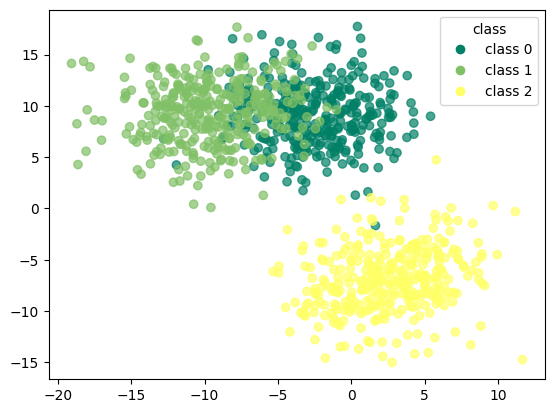

In [58]:
scatter = plt.scatter(df_kmeans.iloc[:, 0],df_kmeans.iloc[:, 1], 
                      c=df_kmeans['target'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_kmeans['target'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="class")
plt.show()

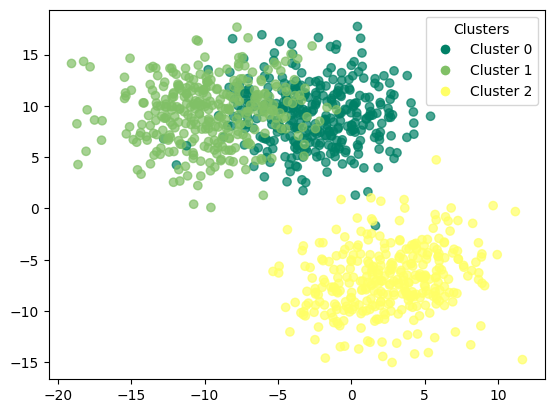

In [59]:
scatter = plt.scatter(df_kmeans.iloc[:, 0], df_kmeans.iloc[:, 1], 
                      c=df_kmeans['k_means'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_kmeans['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [60]:
kmeans.cluster_centers_

array([[-1.08034411,  0.6731195 ,  0.76473505, -0.81297267, -0.40016347,
        -0.56432627,  0.64735624, -0.50680444, -0.62273446, -0.20554125],
       [ 0.96333904, -1.31135559, -1.15269338, -0.11477195,  0.910427  ,
         1.24504179,  0.01780966, -0.52070752,  0.29543962, -0.95542473],
       [ 0.11700507,  0.63823609,  0.38795833,  0.92774463, -0.51026352,
        -0.68071551, -0.6651659 ,  1.02751196,  0.32729484,  1.16096598]])

In [61]:
print(confusion_matrix(df_kmeans['target'],df_kmeans['k_means']))

[[330   3   0]
 [  3 330   0]
 [  0   0 333]]


In [62]:
print(classification_report(df_kmeans['target'],df_kmeans['k_means']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.99      0.99      0.99       999
weighted avg       0.99      0.99      0.99       999



### k-means with pca

In [63]:
kmeans_pca = KMeans(n_clusters=3,init='k-means++',random_state=42)

In [64]:
kmeans_pca.fit(X_pca)

KMeans(n_clusters=3, random_state=42)

In [65]:
df_pca_kmeans = corr_dataset.copy()

In [66]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [67]:
df_pca_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  kmeans_pca  
0    4.323220  2.585761  5.065556       0           2  
1    6.353955  0.137074  7.170266       0           2  
2    8.187964 -0.746995  9.100161       0           2  
3    8.011795 -2.707305  4.126568       0           2  
4    5.900886  3.439981  9.536965       0           2  
..        ...       ...       ...     ...         ...  
994  7.519724  0.239838 -9.269743       2           1  
995  0.480927  3.353072 -8.839961       2           1  
996 -6.534461  7.378898 -5.463060       2           1  
997  2.309382  5.359316 -9.237454       2           1  
998 -0.950249  4.205124 -8.835577       2           1  

[999 rows x 12 columns]

In [68]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.003003003003003003
accuracy after: 0.993993993993994


In [69]:
df_pca_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  kmeans_pca  
0    4.323220  2.585761  5.065556       0           0  
1    6.353955  0.137074  7.170266       0           0  
2    8.187964 -0.746995  9.100161       0           0  
3    8.011795 -2.707305  4.126568       0           0  
4    5.900886  3.439981  9.536965       0           0  
..        ...       ...       ...     ...         ...  
994  7.519724  0.239838 -9.269743       2           2  
995  0.480927  3.353072 -8.839961       2           2  
996 -6.534461  7.378898 -5.463060       2           2  
997  2.309382  5.359316 -9.237454       2           2  
998 -0.950249  4.205124 -8.835577       2           2  

[999 rows x 12 columns]

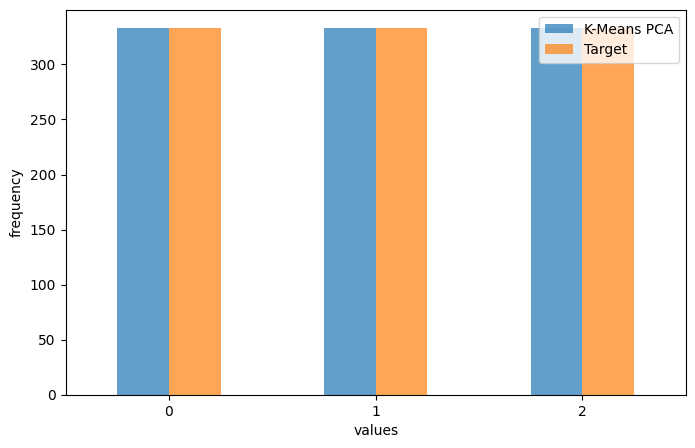

In [70]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [71]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[330   3   0]
 [  3 330   0]
 [  0   0 333]]


In [72]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.99      0.99      0.99       999
weighted avg       0.99      0.99      0.99       999



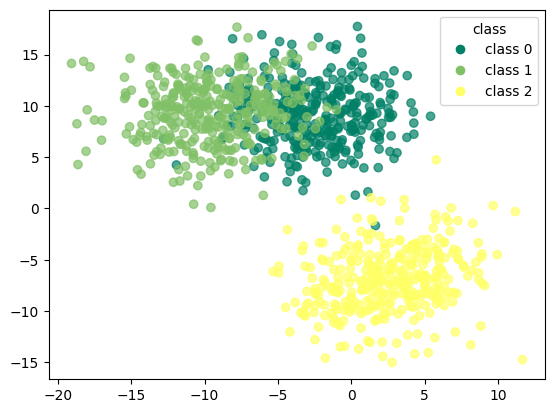

In [73]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

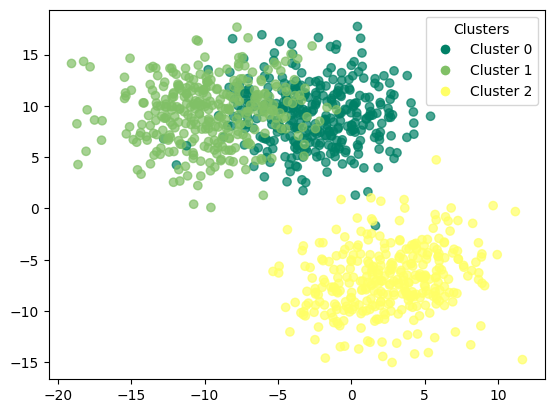

In [74]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

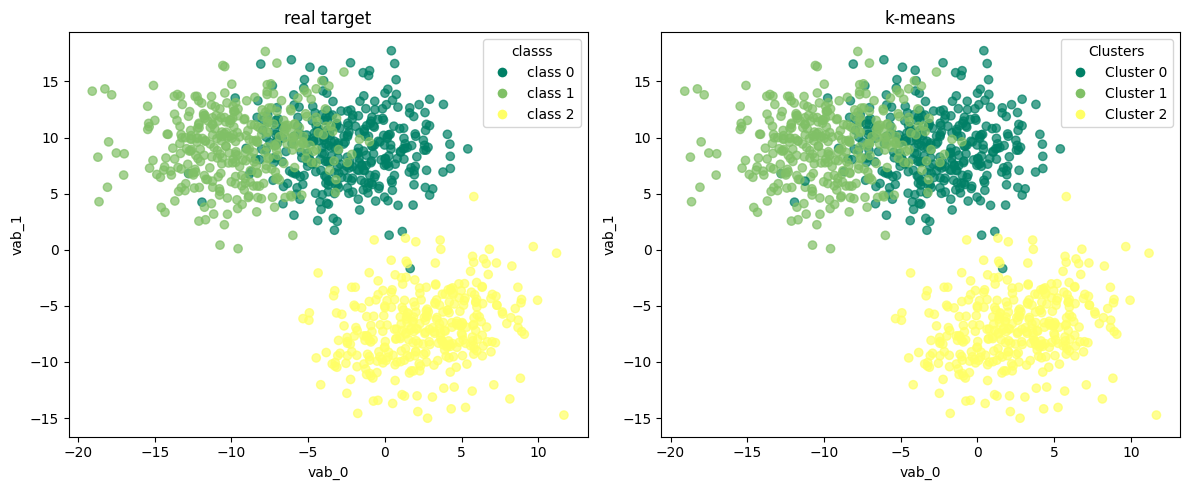

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

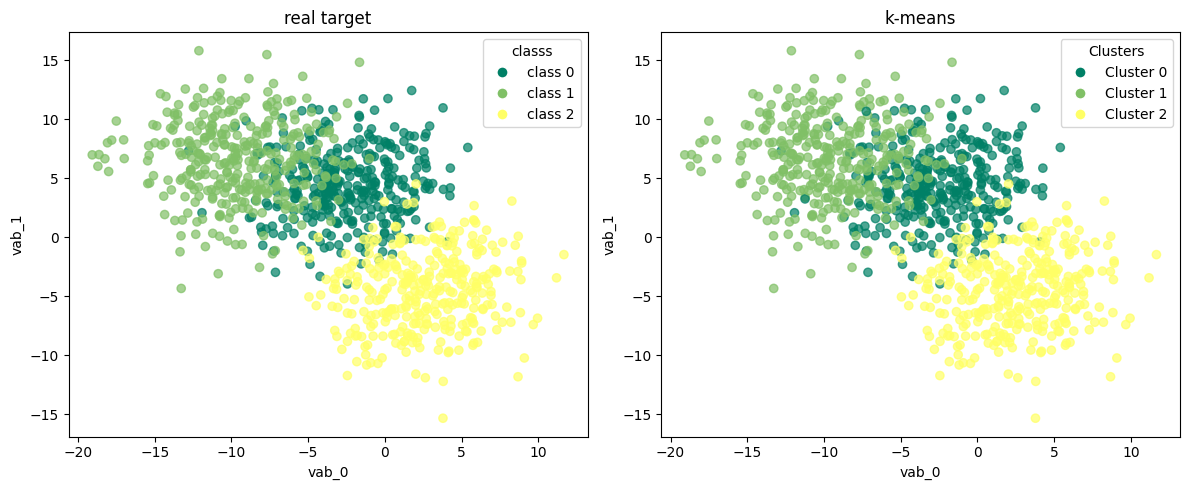

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

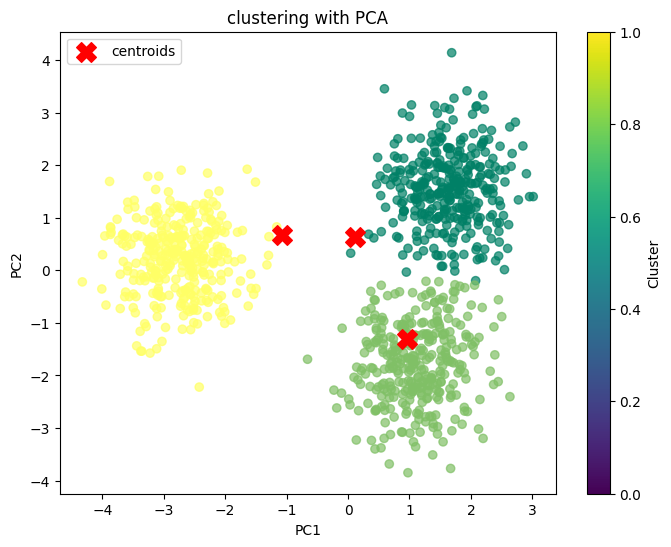

In [77]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'] , c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('clustering with PCA')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

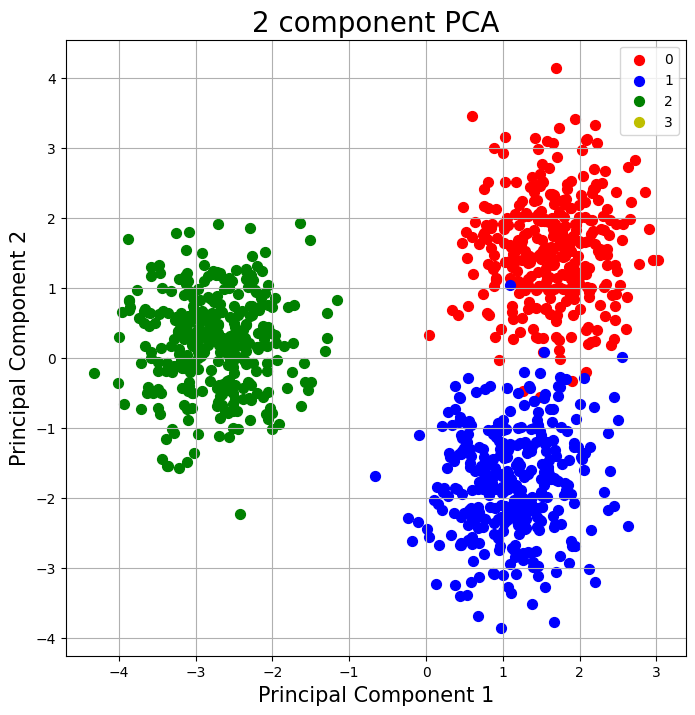

In [78]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### k-means with t-SNE

In [79]:
kmeans_tsne = KMeans(n_clusters=3,init='k-means++',random_state=42)

In [80]:
kmeans_tsne.fit(X_tsne)

KMeans(n_clusters=3, random_state=42)

In [81]:
df_tsne_kmeans = corr_dataset.copy()

In [82]:
df_tsne_kmeans['kmeans_tsne'] = kmeans_tsne.labels_

In [83]:
df_tsne_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  kmeans_tsne  
0    4.323220  2.585761  5.065556       0            2  
1    6.353955  0.137074  7.170266       0            2  
2    8.187964 -0.746995  9.100161       0            2  
3    8.011795 -2.707305  4.126568       0            2  
4    5.900886  3.439981  9.536965       0            2  
..        ...       ...       ...     ...          ...  
994  7.519724  0.239838 -9.269743       2            1  
995  0.480927  3.353072 -8.839961       2            1  
996 -6.534461  7.378898 -5.463060       2            1  
997  2.309382  5.359316 -9.237454       2            1  
998 -0.950249  4.205124 -8.835577       2            1  

[999 rows x 12 columns]

In [84]:
y_true = df_tsne_kmeans['target'].values  
y_kmeans = df_tsne_kmeans['kmeans_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_kmeans['kmeans_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_kmeans['kmeans_tsne'] == y_true))

accuracy before: 0.005005005005005005
accuracy after: 0.991991991991992


In [85]:
df_tsne_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  kmeans_tsne  
0    4.323220  2.585761  5.065556       0            0  
1    6.353955  0.137074  7.170266       0            0  
2    8.187964 -0.746995  9.100161       0            0  
3    8.011795 -2.707305  4.126568       0            0  
4    5.900886  3.439981  9.536965       0            0  
..        ...       ...       ...     ...          ...  
994  7.519724  0.239838 -9.269743       2            2  
995  0.480927  3.353072 -8.839961       2            2  
996 -6.534461  7.378898 -5.463060       2            2  
997  2.309382  5.359316 -9.237454       2            2  
998 -0.950249  4.205124 -8.835577       2            2  

[999 rows x 12 columns]

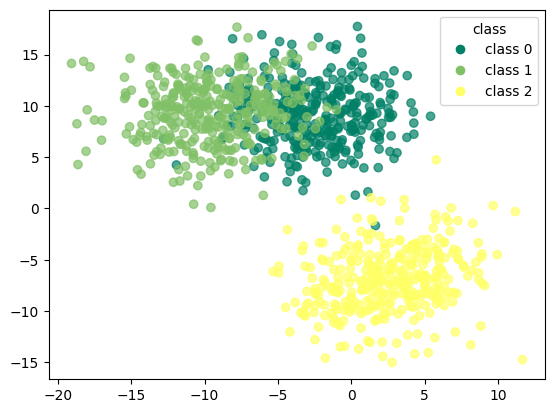

In [86]:
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

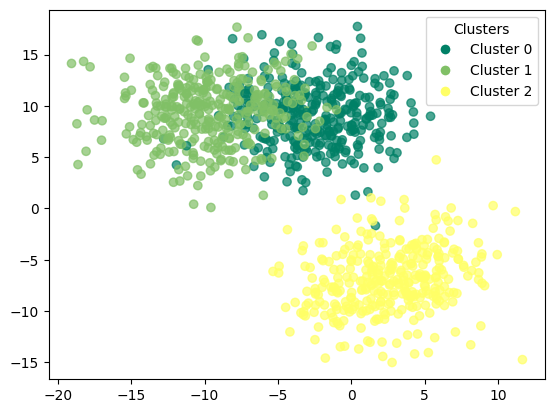

In [87]:
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['kmeans_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_kmeans['kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

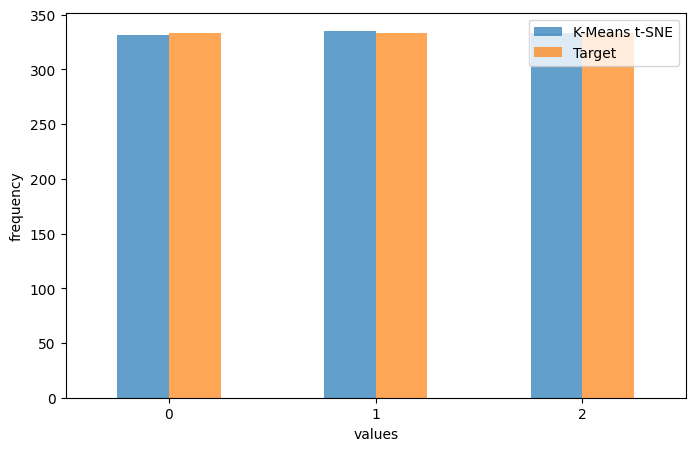

In [88]:
counts_kmeans = df_tsne_kmeans['kmeans_tsne'].value_counts().sort_index()
counts_target = df_tsne_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means t-SNE", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [89]:
print(confusion_matrix(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne']))

[[328   5   0]
 [  3 330   0]
 [  0   0 333]]


In [90]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.99      0.99      0.99       999
weighted avg       0.99      0.99      0.99       999



### k-means with umap

In [91]:
kmeans_umap = KMeans(n_clusters=3,init='k-means++',random_state=42)

In [92]:
kmeans_umap.fit(X_umap)

KMeans(n_clusters=3, random_state=42)

In [93]:
df_umap_kmeans = corr_dataset.copy()

In [94]:
df_umap_kmeans['kmeans_umap'] = kmeans_umap.labels_

In [95]:
df_umap_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  kmeans_umap  
0    4.323220  2.585761  5.065556       0            2  
1    6.353955  0.137074  7.170266       0            2  
2    8.187964 -0.746995  9.100161       0            2  
3    8.011795 -2.707305  4.126568       0            2  
4    5.900886  3.439981  9.536965       0            2  
..        ...       ...       ...     ...          ...  
994  7.519724  0.239838 -9.269743       2            1  
995  0.480927  3.353072 -8.839961       2            1  
996 -6.534461  7.378898 -5.463060       2            1  
997  2.309382  5.359316 -9.237454       2            1  
998 -0.950249  4.205124 -8.835577       2            1  

[999 rows x 12 columns]

In [96]:
y_true = df_umap_kmeans['target'].values  
y_kmeans = df_umap_kmeans['kmeans_umap'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_umap_kmeans['kmeans_umap'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_umap_kmeans['kmeans_umap'] == y_true))

accuracy before: 0.004004004004004004
accuracy after: 0.992992992992993


In [97]:
df_umap_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  kmeans_umap  
0    4.323220  2.585761  5.065556       0            0  
1    6.353955  0.137074  7.170266       0            0  
2    8.187964 -0.746995  9.100161       0            0  
3    8.011795 -2.707305  4.126568       0            0  
4    5.900886  3.439981  9.536965       0            0  
..        ...       ...       ...     ...          ...  
994  7.519724  0.239838 -9.269743       2            2  
995  0.480927  3.353072 -8.839961       2            2  
996 -6.534461  7.378898 -5.463060       2            2  
997  2.309382  5.359316 -9.237454       2            2  
998 -0.950249  4.205124 -8.835577       2            2  

[999 rows x 12 columns]

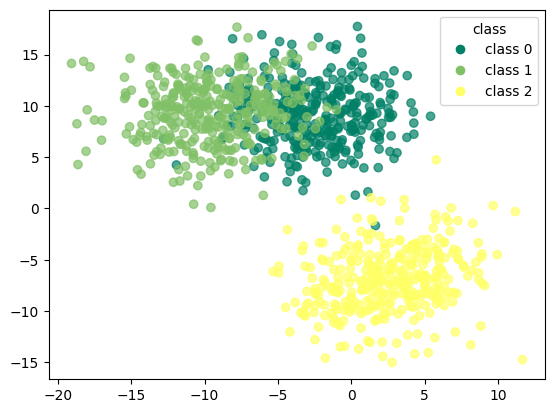

In [98]:
scatter = plt.scatter(df_umap_kmeans.iloc[:, 0], df_umap_kmeans.iloc[:, 1], 
                      c=df_umap_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_umap_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

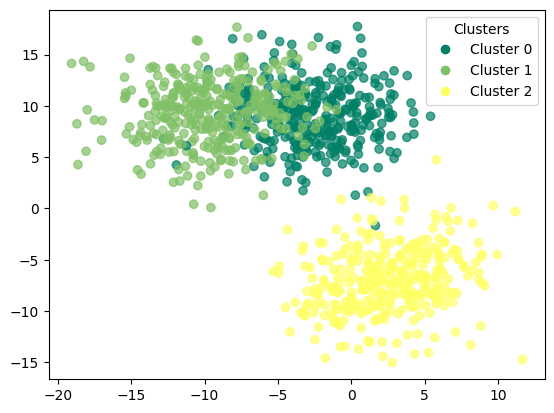

In [99]:
scatter = plt.scatter(df_umap_kmeans.iloc[:, 0], df_umap_kmeans.iloc[:, 1], 
                      c=df_umap_kmeans['kmeans_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_kmeans['kmeans_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

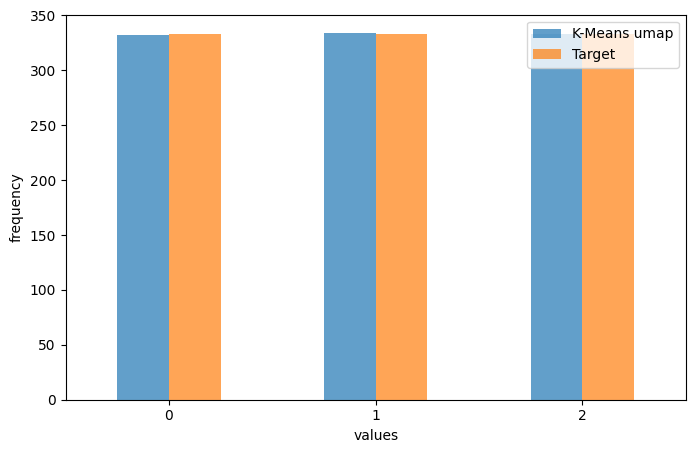

In [100]:
counts_kmeans = df_umap_kmeans['kmeans_umap'].value_counts().sort_index()
counts_target = df_umap_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means umap': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means umap", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [101]:
print(confusion_matrix(df_umap_kmeans['target'],df_umap_kmeans['kmeans_umap']))

[[329   4   0]
 [  3 330   0]
 [  0   0 333]]


In [102]:
print(classification_report(df_umap_kmeans['target'],df_umap_kmeans['kmeans_umap'])) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.99      0.99      0.99       999
weighted avg       0.99      0.99      0.99       999



## trimmed k-means

In [103]:
def trimmed_clustering(X,n_clusters,trim_fraction=0.1):

    kmeans = KMeans(n_clusters=n_clusters,random_state=42).fit(X)
    distances = np.min(kmeans.transform(X),axis=1)
    
    trim_threshold = np.percentile(distances,100 * (1 - trim_fraction))
    trimmed_X = X[distances < trim_threshold]
    trimmed_indices = np.where(distances < trim_threshold)[0]
    trimmed_kmeans = KMeans(n_clusters=n_clusters,random_state=42).fit(trimmed_X)
    
    return trimmed_kmeans,trimmed_indices

In [104]:
trimmed_kmeans,trimmmed_indces = trimmed_clustering(X_values,n_clusters=3,trim_fraction=0.1)

In [105]:
trimmed_kmeans

KMeans(n_clusters=3, random_state=42)

In [106]:
df_trim_kmeans = corr_dataset.copy()

In [107]:
df_trim_kmeans = df_trim_kmeans.iloc[trimmmed_indces]  

In [108]:
df_trim_kmeans['trim_kmeans'] = trimmed_kmeans.labels_

In [109]:
df_trim_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  trim_kmeans  
0    4.323220  2.585761  5.065556       0            2  
1    6.353955  0.137074  7.170266       0            2  
2    8.187964 -0.746995  9.100161       0            2  
3    8.011795 -2.707305  4.126568       0            2  
4    5.900886  3.439981  9.536965       0            2  
..        ...       ...       ...     ...          ...  
994  7.519724  0.239838 -9.269743       2            1  
995  0.480927  3.353072 -8.839961       2            1  
996 -6.534461  7.378898 -5.463060       2            1  
997  2.309382  5.359316 -9.237454       2            1  
998 -0.950249  4.205124 -8.835577       2            1  

[899 rows x 12 columns]

In [110]:
y_true = df_trim_kmeans['target'].values  
y_kmeans = df_trim_kmeans['trim_kmeans'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_trim_kmeans['trim_kmeans'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_trim_kmeans['trim_kmeans'] == y_true))

accuracy before: 0.002224694104560623
accuracy after: 0.9955506117908788


In [111]:
df_trim_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  trim_kmeans  
0    4.323220  2.585761  5.065556       0            0  
1    6.353955  0.137074  7.170266       0            0  
2    8.187964 -0.746995  9.100161       0            0  
3    8.011795 -2.707305  4.126568       0            0  
4    5.900886  3.439981  9.536965       0            0  
..        ...       ...       ...     ...          ...  
994  7.519724  0.239838 -9.269743       2            2  
995  0.480927  3.353072 -8.839961       2            2  
996 -6.534461  7.378898 -5.463060       2            2  
997  2.309382  5.359316 -9.237454       2            2  
998 -0.950249  4.205124 -8.835577       2            2  

[899 rows x 12 columns]

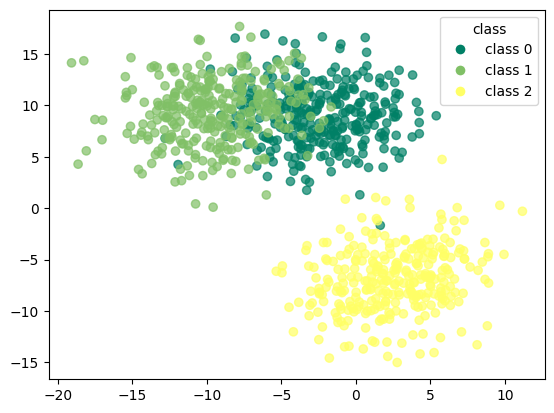

In [112]:
scatter = plt.scatter(df_trim_kmeans.iloc[:, 0], df_trim_kmeans.iloc[:, 1], 
                      c=df_trim_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_trim_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

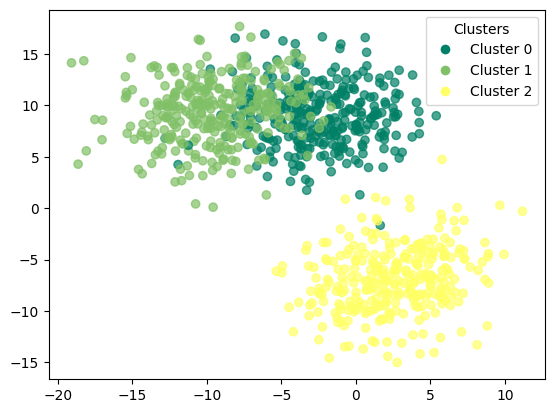

In [113]:
scatter = plt.scatter(df_trim_kmeans.iloc[:, 0], df_trim_kmeans.iloc[:, 1], 
                      c=df_trim_kmeans['trim_kmeans'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_trim_kmeans['trim_kmeans'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [114]:
print(confusion_matrix(df_trim_kmeans['target'],df_trim_kmeans['trim_kmeans']))

[[306   2   0]
 [  2 293   0]
 [  0   0 296]]


In [115]:
print(classification_report(df_trim_kmeans['target'],df_trim_kmeans['trim_kmeans']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       308
           1       0.99      0.99      0.99       295
           2       1.00      1.00      1.00       296

    accuracy                           1.00       899
   macro avg       1.00      1.00      1.00       899
weighted avg       1.00      1.00      1.00       899



### trimmed k-means with pca

In [116]:
trim_kmeans_pca,trimmmed_indices = trimmed_clustering(X_pca,n_clusters=3,trim_fraction=0.1)

In [117]:
trim_kmeans_pca

KMeans(n_clusters=3, random_state=42)

In [118]:
df_pca_trim_kmeans = corr_dataset.copy()

In [119]:
df_pca_trim_kmeans = df_pca_trim_kmeans.iloc[trimmmed_indces]  

In [120]:
df_pca_trim_kmeans["trim_kmeans_pca"] = trim_kmeans_pca.labels_

In [121]:
df_pca_trim_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  trim_kmeans_pca  
0    4.323220  2.585761  5.065556       0                2  
1    6.353955  0.137074  7.170266       0                2  
2    8.187964 -0.746995  9.100161       0                2  
3    8.011795 -2.707305  4.126568       0                2  
4    5.900886  3.439981  9.536965       0                2  
..        ...       ...       ...     ...              ...  
994  7.519724  0.239838 -9.269743       2                1  
995  0.480927  3.353072 -8.839961       2                1  
996 -6.534461  7.378898 -5.463060       2                1  
997  2.309382  5.359316 -9.237454       2                1  
998 -0.950249  4.205124 -8.835577       2                1  

[899 rows x 12 columns]

In [122]:
y_true = df_pca_trim_kmeans['target'].values  
y_kmeans = df_pca_trim_kmeans['trim_kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_trim_kmeans['trim_kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_trim_kmeans['trim_kmeans_pca'] == y_true))

accuracy before: 0.025583982202447165
accuracy after: 0.9733036707452726


In [123]:
df_pca_trim_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  trim_kmeans_pca  
0    4.323220  2.585761  5.065556       0                0  
1    6.353955  0.137074  7.170266       0                0  
2    8.187964 -0.746995  9.100161       0                0  
3    8.011795 -2.707305  4.126568       0                0  
4    5.900886  3.439981  9.536965       0                0  
..        ...       ...       ...     ...              ...  
994  7.519724  0.239838 -9.269743       2                2  
995  0.480927  3.353072 -8.839961       2                2  
996 -6.534461  7.378898 -5.463060       2                2  
997  2.309382  5.359316 -9.237454       2                2  
998 -0.950249  4.205124 -8.835577       2                2  

[899 rows x 12 columns]

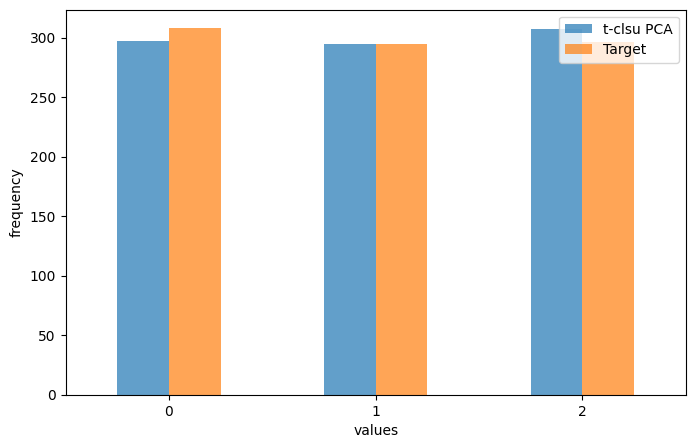

In [124]:
counts_kmeans = df_pca_trim_kmeans['trim_kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_trim_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'t-clust PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["t-clsu PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [125]:
print(confusion_matrix(df_pca_trim_kmeans['target'],df_pca_trim_kmeans['trim_kmeans_pca']))

[[296  12   0]
 [  1 283  11]
 [  0   0 296]]


In [126]:
print(classification_report(df_pca_trim_kmeans['target'],df_pca_trim_kmeans['trim_kmeans_pca']))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       308
           1       0.96      0.96      0.96       295
           2       0.96      1.00      0.98       296

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



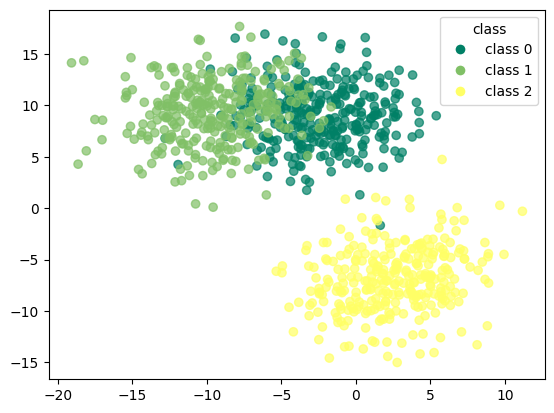

In [127]:
scatter = plt.scatter(df_pca_trim_kmeans.iloc[:, 0], df_pca_trim_kmeans.iloc[:, 1], 
                      c=df_pca_trim_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_trim_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

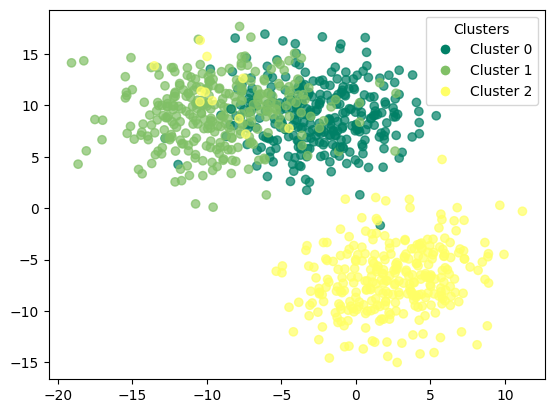

In [128]:
scatter = plt.scatter(df_pca_trim_kmeans.iloc[:, 0], df_pca_trim_kmeans.iloc[:, 1], 
                      c=df_pca_trim_kmeans['trim_kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_trim_kmeans['trim_kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

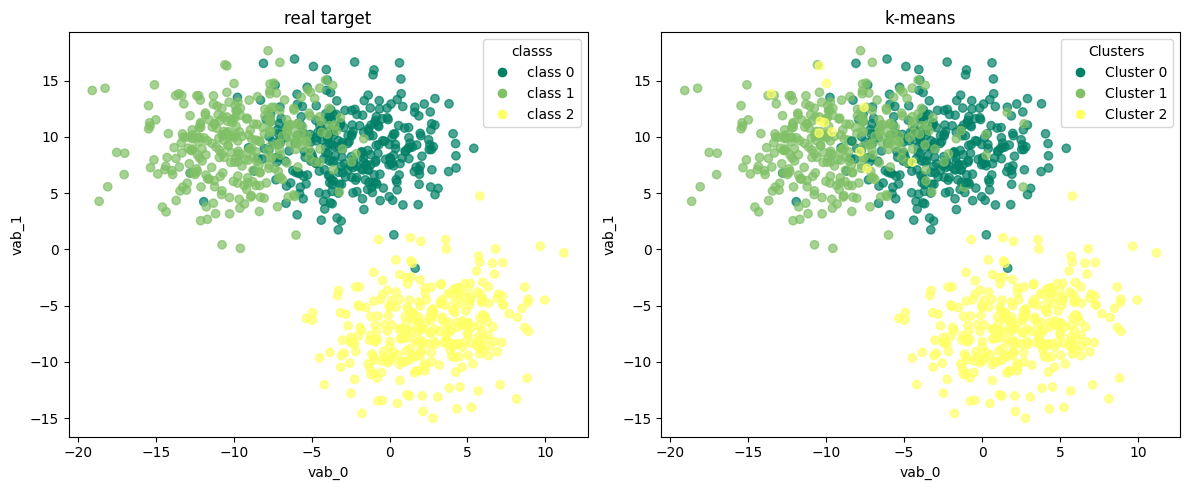

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_trim_kmeans.iloc[:, 0], df_pca_trim_kmeans.iloc[:, 1], 
                           c=df_pca_trim_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_trim_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_trim_kmeans.iloc[:, 0], df_pca_trim_kmeans.iloc[:, 1], 
                           c=df_pca_trim_kmeans['trim_kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_trim_kmeans['trim_kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

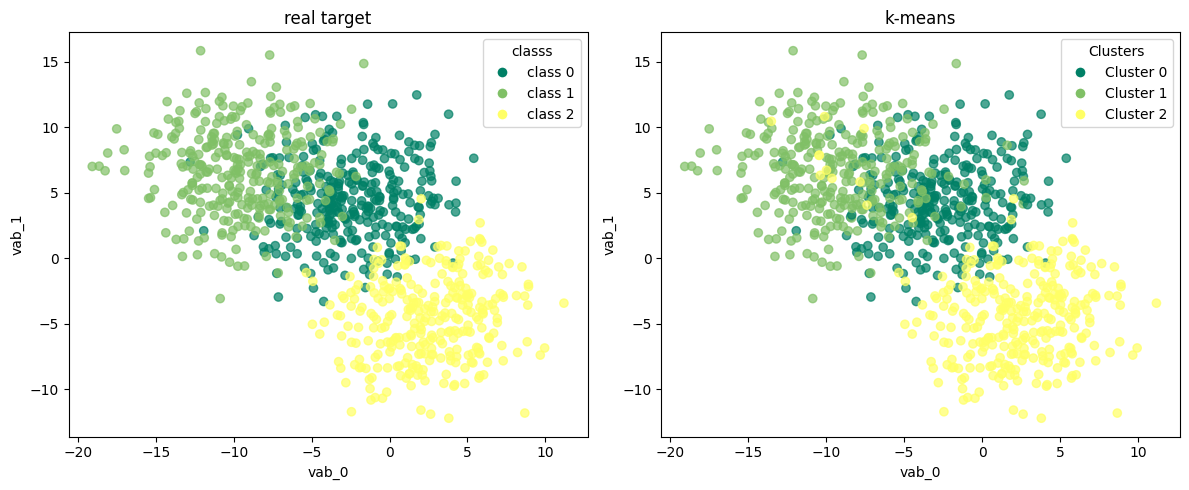

In [130]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_trim_kmeans.iloc[:, 0], df_pca_trim_kmeans.iloc[:, 2], 
                           c=df_pca_trim_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_trim_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_trim_kmeans.iloc[:, 0], df_pca_trim_kmeans.iloc[:, 2], 
                           c=df_pca_trim_kmeans['trim_kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_trim_kmeans['trim_kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

### trimmed k-means with t-SNE

In [131]:
trim_kmeans_tsne,trimmmed_indices = trimmed_clustering(X_tsne,n_clusters=3,trim_fraction=0.1)

In [132]:
trim_kmeans_tsne

KMeans(n_clusters=3, random_state=42)

In [133]:
df_tsne_trim_kmeans = corr_dataset.copy()

In [134]:
df_tsne_trim_kmeans = df_tsne_trim_kmeans.iloc[trimmmed_indces]  

In [135]:
df_tsne_trim_kmeans['trim_kmeans_tsne'] = trim_kmeans_tsne.labels_

In [136]:
df_tsne_trim_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  trim_kmeans_tsne  
0    4.323220  2.585761  5.065556       0                 2  
1    6.353955  0.137074  7.170266       0                 2  
2    8.187964 -0.746995  9.100161       0                 2  
3    8.011795 -2.707305  4.126568       0                 2  
4    5.900886  3.439981  9.536965       0                 2  
..        ...       ...       ...     ...               ...  
994  7.519724  0.239838 -9.269743       2                 1  
995  0.480927  3.353072 -8.839961       2                 1  
996 -6.534461  7.378898 -5.463060       2                 1  
997  2.309382  5.359316 -9.237454       2                 1  
998 -0.950249  4.205124 -8.835577       2                 1  

[899 rows x 12 columns]

In [137]:
y_true = df_tsne_trim_kmeans['target'].values  
y_kmeans = df_tsne_trim_kmeans['trim_kmeans_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_trim_kmeans['trim_kmeans_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_trim_kmeans['trim_kmeans_tsne'] == y_true))

accuracy before: 0.021134593993325918
accuracy after: 0.9777530589543938


In [138]:
df_tsne_trim_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  trim_kmeans_tsne  
0    4.323220  2.585761  5.065556       0                 0  
1    6.353955  0.137074  7.170266       0                 0  
2    8.187964 -0.746995  9.100161       0                 0  
3    8.011795 -2.707305  4.126568       0                 0  
4    5.900886  3.439981  9.536965       0                 0  
..        ...       ...       ...     ...               ...  
994  7.519724  0.239838 -9.269743       2                 2  
995  0.480927  3.353072 -8.839961       2                 2  
996 -6.534461  7.378898 -5.463060       2                 2  
997  2.309382  5.359316 -9.237454       2                 2  
998 -0.950249  4.205124 -8.835577       2                 2  

[899 rows x 12 columns]

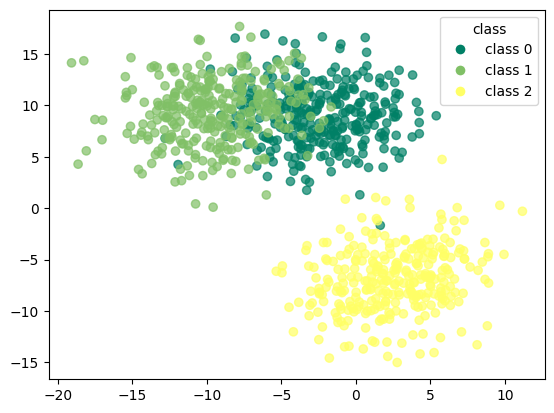

In [139]:
scatter = plt.scatter(df_tsne_trim_kmeans.iloc[:, 0], df_tsne_trim_kmeans.iloc[:, 1], 
                      c=df_tsne_trim_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_trim_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

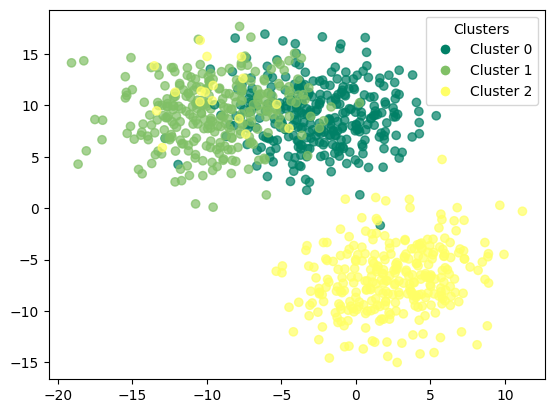

In [140]:
scatter = plt.scatter(df_tsne_trim_kmeans.iloc[:, 0], df_tsne_trim_kmeans.iloc[:, 1], 
                      c=df_tsne_trim_kmeans['trim_kmeans_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_trim_kmeans['trim_kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

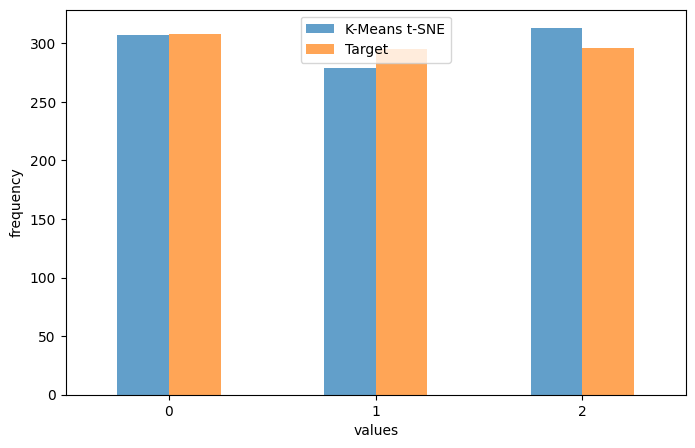

In [141]:
counts_kmeans = df_tsne_trim_kmeans['trim_kmeans_tsne'].value_counts().sort_index()
counts_target = df_tsne_trim_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means t-SNE", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [142]:
print(confusion_matrix(df_tsne_trim_kmeans['target'],df_tsne_trim_kmeans['trim_kmeans_tsne']))

[[306   2   0]
 [  1 277  17]
 [  0   0 296]]


In [143]:
print(classification_report(df_tsne_trim_kmeans['target'],df_tsne_trim_kmeans['trim_kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       308
           1       0.99      0.94      0.97       295
           2       0.95      1.00      0.97       296

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899



### trimmed k-means with umap

In [144]:
trim_kmeans_umap,trimmmed_indices = trimmed_clustering(X_umap,n_clusters=3,trim_fraction=0.1)

In [145]:
trim_kmeans_umap

KMeans(n_clusters=3, random_state=42)

In [146]:
df_umap_trim_kmeans = corr_dataset.copy()

In [147]:
df_umap_trim_kmeans = df_umap_trim_kmeans.iloc[trimmmed_indices]

In [148]:
df_umap_trim_kmeans['trim_kmeans_umap'] = trim_kmeans_umap.labels_

In [149]:
df_umap_trim_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  trim_kmeans_umap  
0    4.323220  2.585761  5.065556       0                 2  
1    6.353955  0.137074  7.170266       0                 2  
2    8.187964 -0.746995  9.100161       0                 2  
3    8.011795 -2.707305  4.126568       0                 2  
4    5.900886  3.439981  9.536965       0                 2  
..        ...       ...       ...     ...               ...  
994  7.519724  0.239838 -9.269743       2                 1  
995  0.480927  3.353072 -8.839961       2                 1  
996 -6.534461  7.378898 -5.463060       2                 1  
997  2.309382  5.359316 -9.237454       2                 1  
998 -0.950249  4.205124 -8.835577       2                 1  

[899 rows x 12 columns]

In [150]:
y_true = df_umap_trim_kmeans['target'].values  
y_kmeans = df_umap_trim_kmeans['trim_kmeans_umap'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_umap_trim_kmeans['trim_kmeans_umap'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_umap_trim_kmeans['trim_kmeans_umap'] == y_true))

accuracy before: 0.0011123470522803114
accuracy after: 0.9977753058954394


In [151]:
df_umap_trim_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  trim_kmeans_umap  
0    4.323220  2.585761  5.065556       0                 0  
1    6.353955  0.137074  7.170266       0                 0  
2    8.187964 -0.746995  9.100161       0                 0  
3    8.011795 -2.707305  4.126568       0                 0  
4    5.900886  3.439981  9.536965       0                 0  
..        ...       ...       ...     ...               ...  
994  7.519724  0.239838 -9.269743       2                 2  
995  0.480927  3.353072 -8.839961       2                 2  
996 -6.534461  7.378898 -5.463060       2                 2  
997  2.309382  5.359316 -9.237454       2                 2  
998 -0.950249  4.205124 -8.835577       2                 2  

[899 rows x 12 columns]

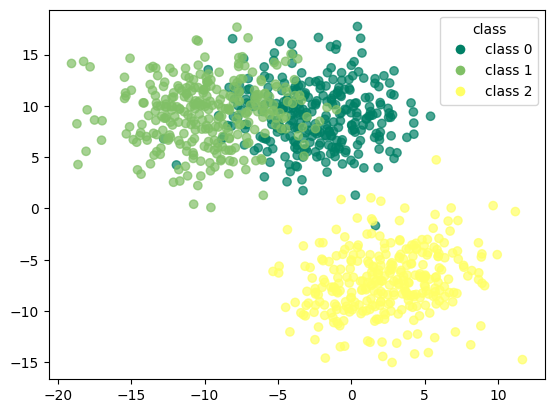

In [152]:
scatter = plt.scatter(df_umap_trim_kmeans.iloc[:, 0], df_umap_trim_kmeans.iloc[:, 1], 
                      c=df_umap_trim_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_umap_trim_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

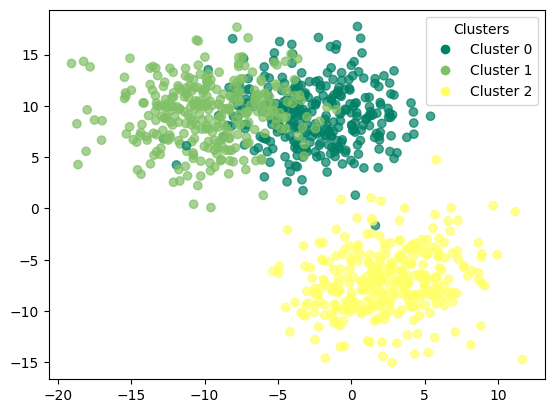

In [153]:
scatter = plt.scatter(df_umap_trim_kmeans.iloc[:, 0], df_umap_trim_kmeans.iloc[:, 1], 
                      c=df_umap_trim_kmeans['trim_kmeans_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_trim_kmeans['trim_kmeans_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

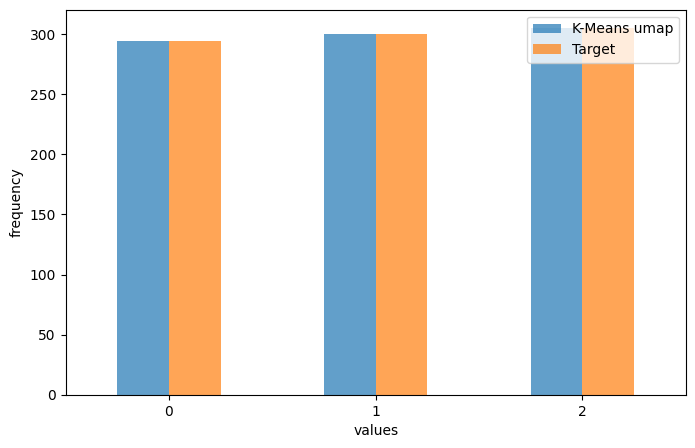

In [154]:
counts_kmeans = df_umap_trim_kmeans['trim_kmeans_umap'].value_counts().sort_index()
counts_target = df_umap_trim_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means umap': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means umap", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [155]:
print(confusion_matrix(df_umap_trim_kmeans['target'],df_umap_trim_kmeans['trim_kmeans_umap']))

[[293   1   0]
 [  1 299   0]
 [  0   0 305]]


In [156]:
print(classification_report(df_umap_trim_kmeans['target'],df_umap_trim_kmeans['trim_kmeans_umap'])) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       294
           1       1.00      1.00      1.00       300
           2       1.00      1.00      1.00       305

    accuracy                           1.00       899
   macro avg       1.00      1.00      1.00       899
weighted avg       1.00      1.00      1.00       899



## dbscan

In [157]:
def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()

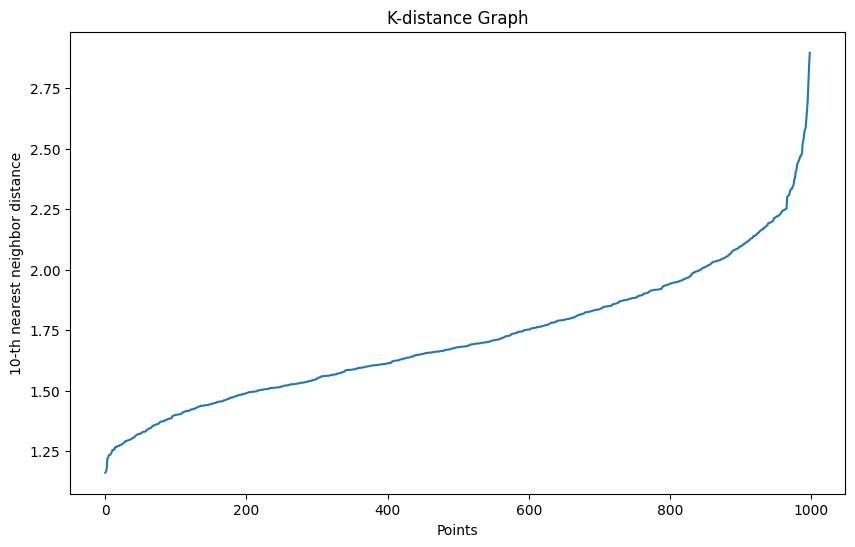

In [158]:
plot_k_distance_graph(X_values,k=10) 

In [159]:
dbscan = DBSCAN(eps=0.9,min_samples=10) # min_samples = 2*n_features

In [160]:
dbscan.fit(X_values)

DBSCAN(eps=0.9, min_samples=10)

In [161]:
df_dbscan = corr_dataset.copy()

In [162]:
df_dbscan['dbscan'] = dbscan.labels_

In [163]:
y_true = df_dbscan['target'].values  
y_kmeans = df_dbscan['dbscan'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_dbscan['dbscan'] = np.array([mapping[label] if label in mapping else -1 for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_dbscan['dbscan'] == y_true))

accuracy before: 0.0
accuracy after: 0.0


In [164]:
df_dbscan

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  dbscan  
0    4.323220  2.585761  5.065556       0      -1  
1    6.353955  0.137074  7.170266       0      -1  
2    8.187964 -0.746995  9.100161       0      -1  
3    8.011795 -2.707305  4.126568       0      -1  
4    5.900886  3.439981  9.536965       0      -1  
..        ...       ...       ...     ...     ...  
994  7.519724  0.239838 -9.269743       2      -1  
995  0.480927  3.353072 -8.839961       2      -1  
996 -6.534461  7.378898 -5.463060       2      -1  
997  2.309382  5.359316 -9.237454       2      -1  
998 -0.950249  4.205124 -8.835577       2      -1  

[999 rows x 12 columns]

In [165]:
print(df_dbscan['dbscan'].value_counts())

dbscan
-1    999
Name: count, dtype: int64


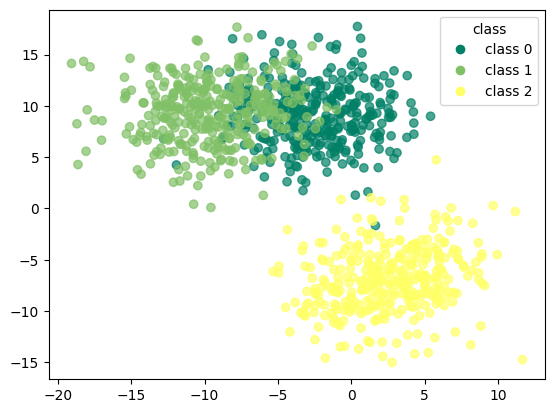

In [166]:
scatter = plt.scatter(df_dbscan.iloc[:, 0], df_dbscan.iloc[:, 1], 
                      c=df_dbscan['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_dbscan['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

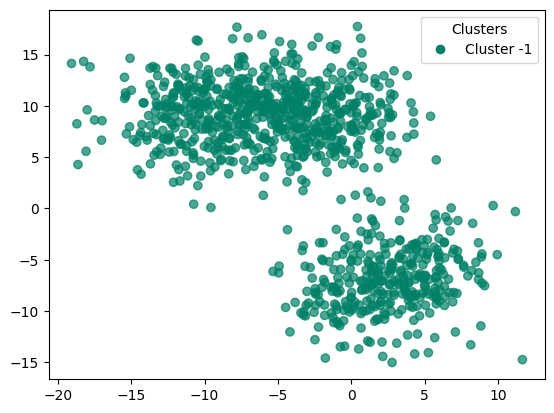

In [167]:
scatter = plt.scatter(df_dbscan.iloc[:, 0], df_dbscan.iloc[:, 1], 
                      c=df_dbscan['dbscan'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_dbscan['dbscan'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [168]:
print(confusion_matrix(df_dbscan['target'],df_dbscan['dbscan']))

[[  0   0   0   0]
 [333   0   0   0]
 [333   0   0   0]
 [333   0   0   0]]


In [169]:
print(classification_report(df_dbscan['target'],df_dbscan['dbscan']))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00     333.0
           1       0.00      0.00      0.00     333.0
           2       0.00      0.00      0.00     333.0

    accuracy                           0.00     999.0
   macro avg       0.00      0.00      0.00     999.0
weighted avg       0.00      0.00      0.00     999.0



### dbscan with pca

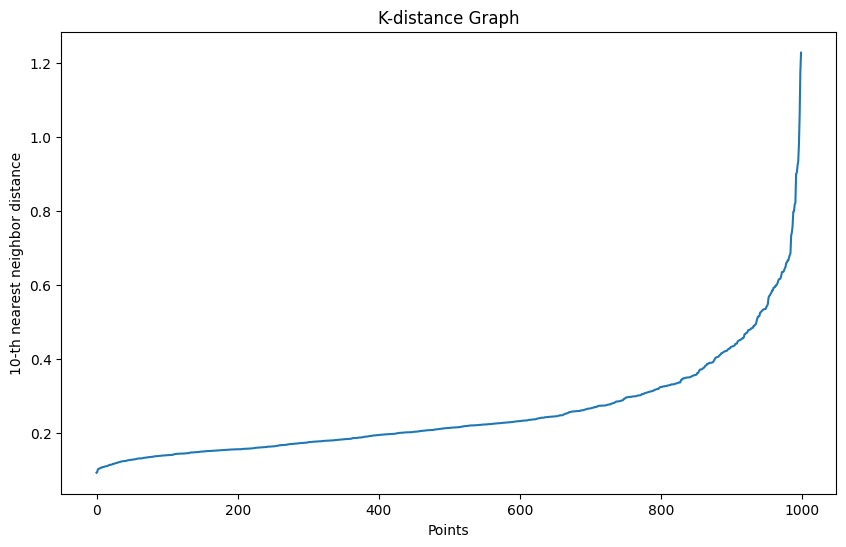

In [170]:
plot_k_distance_graph(X_pca,k=10)

In [171]:
dbscan_pca = DBSCAN(eps=0.4,min_samples=10)

In [172]:
dbscan_pca.fit(X_pca)

DBSCAN(eps=0.4, min_samples=10)

In [173]:
df_pca_dbscan = corr_dataset.copy()

In [174]:
df_pca_dbscan["dbscan_pca"] = dbscan_pca.labels_

In [175]:
y_true = df_pca_dbscan['target'].values  
y_kmeans = df_pca_dbscan['dbscan_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_dbscan['dbscan_pca'] = np.array([mapping[label] if label in mapping else -1 for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_dbscan['dbscan_pca'] == y_true))

accuracy before: 0.3183183183183183
accuracy after: 0.0


In [176]:
df_pca_dbscan

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  dbscan_pca  
0    4.323220  2.585761  5.065556       0           2  
1    6.353955  0.137074  7.170266       0           2  
2    8.187964 -0.746995  9.100161       0           2  
3    8.011795 -2.707305  4.126568       0           2  
4    5.900886  3.439981  9.536965       0           2  
..        ...       ...       ...     ...         ...  
994  7.519724  0.239838 -9.269743       2           1  
995  0.480927  3.353072 -8.839961       2           1  
996 -6.534461  7.378898 -5.463060       2           1  
997  2.309382  5.359316 -9.237454       2           1  
998 -0.950249  4.205124 -8.835577       2           1  

[999 rows x 12 columns]

In [177]:
print(df_pca_dbscan['dbscan_pca'].value_counts())

dbscan_pca
 2    635
 1    316
-1     48
Name: count, dtype: int64


In [178]:
print(confusion_matrix(df_pca_dbscan['target'],df_pca_dbscan['dbscan_pca']))

[[  0   0   0   0]
 [ 15   0   0 318]
 [ 16   0   0 317]
 [ 17   0 316   0]]


In [179]:
print(classification_report(df_pca_dbscan['target'],df_pca_dbscan['dbscan_pca']))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00     333.0
           1       0.00      0.00      0.00     333.0
           2       0.00      0.00      0.00     333.0

    accuracy                           0.00     999.0
   macro avg       0.00      0.00      0.00     999.0
weighted avg       0.00      0.00      0.00     999.0



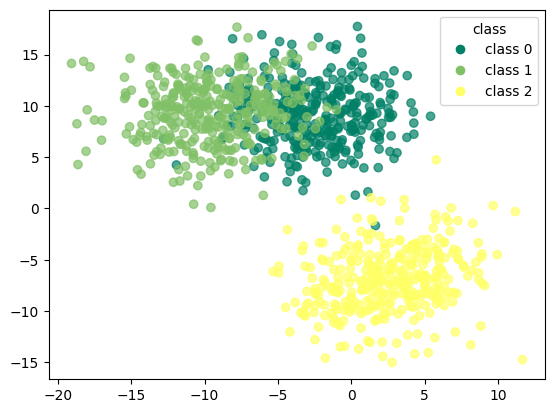

In [180]:
scatter = plt.scatter(df_pca_dbscan.iloc[:, 0], df_pca_dbscan.iloc[:, 1], 
                      c=df_pca_dbscan['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_dbscan['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

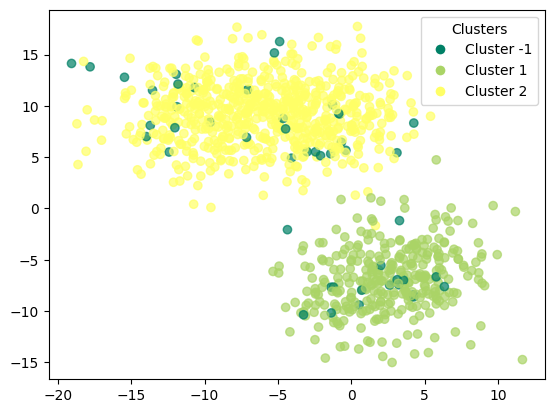

In [181]:
scatter = plt.scatter(df_pca_dbscan.iloc[:, 0], df_pca_dbscan.iloc[:, 1], 
                      c=df_pca_dbscan['dbscan_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_dbscan['dbscan_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

### dbscan with t-SNE

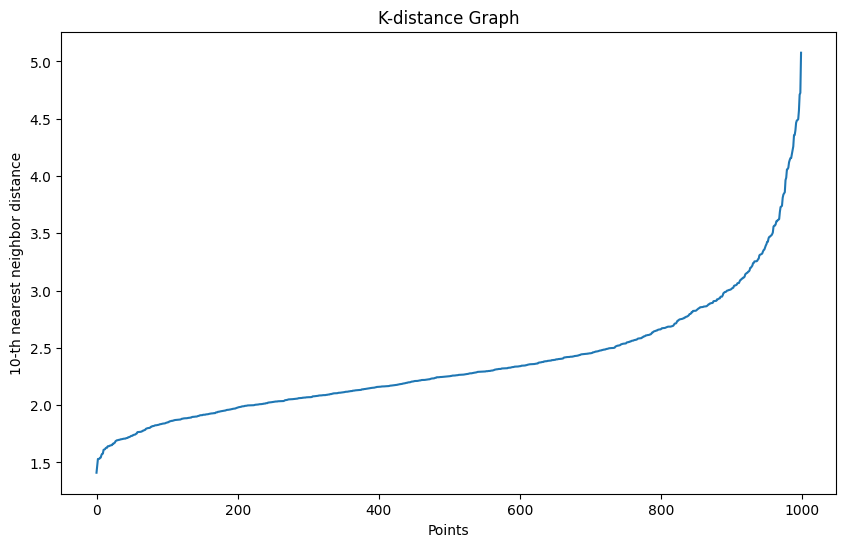

In [182]:
plot_k_distance_graph(X_tsne,k=10)

In [183]:
dbscan_tsne = DBSCAN(eps=3,min_samples=10)

In [184]:
dbscan_tsne.fit(X_tsne)

DBSCAN(eps=3, min_samples=10)

In [185]:
df_tsne_dbscan = corr_dataset.copy()

In [186]:
df_tsne_dbscan['dbscan_tsne'] = dbscan_tsne.labels_

In [187]:
y_true = df_tsne_dbscan['target'].values  
y_kmeans = df_tsne_dbscan['dbscan_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_dbscan['dbscan_tsne'] = np.array([mapping[label] if label in mapping else -1 for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_dbscan['dbscan_tsne'] == y_true))

accuracy before: 0.987987987987988
accuracy after: 0.987987987987988


In [188]:
df_tsne_dbscan

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  dbscan_tsne  
0    4.323220  2.585761  5.065556       0            0  
1    6.353955  0.137074  7.170266       0            0  
2    8.187964 -0.746995  9.100161       0            0  
3    8.011795 -2.707305  4.126568       0            0  
4    5.900886  3.439981  9.536965       0            0  
..        ...       ...       ...     ...          ...  
994  7.519724  0.239838 -9.269743       2            2  
995  0.480927  3.353072 -8.839961       2            2  
996 -6.534461  7.378898 -5.463060       2            2  
997  2.309382  5.359316 -9.237454       2            2  
998 -0.950249  4.205124 -8.835577       2            2  

[999 rows x 12 columns]

In [189]:
print(df_tsne_dbscan['dbscan_tsne'].value_counts())

dbscan_tsne
 1    334
 2    333
 0    326
-1      6
Name: count, dtype: int64


In [190]:
print(confusion_matrix(df_tsne_dbscan['target'],df_tsne_dbscan['dbscan_tsne']))

[[  0   0   0   0]
 [  3 325   5   0]
 [  3   1 329   0]
 [  0   0   0 333]]


In [191]:
print(classification_report(df_tsne_dbscan['target'],df_tsne_dbscan['dbscan_tsne']))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      0.98      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.75      0.74      0.74       999
weighted avg       0.99      0.99      0.99       999



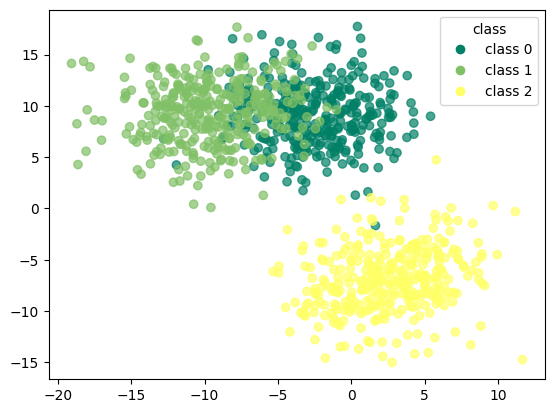

In [192]:
scatter = plt.scatter(df_tsne_dbscan.iloc[:, 0], df_tsne_dbscan.iloc[:, 1], 
                      c=df_tsne_dbscan['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_dbscan['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

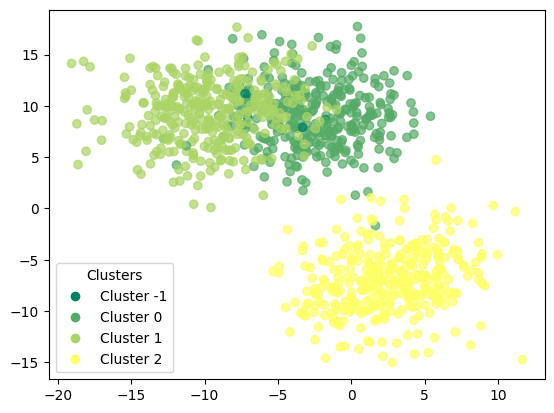

In [193]:
scatter = plt.scatter(df_tsne_dbscan.iloc[:, 0], df_tsne_dbscan.iloc[:, 1], 
                      c=df_tsne_dbscan['dbscan_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_dbscan['dbscan_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

### dbscan with umap

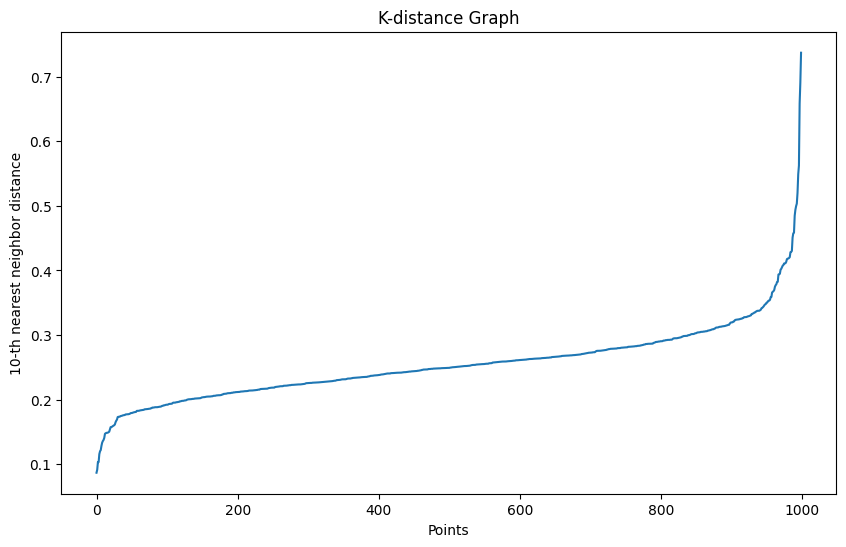

In [194]:
plot_k_distance_graph(X_umap,k=10)

In [195]:
dbscan_umap = DBSCAN(eps=0.6,min_samples=10)

In [196]:
dbscan_umap.fit(X_umap)

DBSCAN(eps=0.6, min_samples=10)

In [197]:
df_umap_dbscan = corr_dataset.copy()

In [198]:
df_umap_dbscan['dbscan_umap'] = dbscan_umap.labels_

In [199]:
y_true = df_umap_dbscan['target'].values  
y_kmeans = df_umap_dbscan['dbscan_umap'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_umap_dbscan['dbscan_umap'] = np.array([mapping[label] if label in mapping else -1 for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_umap_dbscan['dbscan_umap'] == y_true))

accuracy before: 0.992992992992993
accuracy after: 0.992992992992993


In [200]:
df_umap_dbscan

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  dbscan_umap  
0    4.323220  2.585761  5.065556       0            0  
1    6.353955  0.137074  7.170266       0            0  
2    8.187964 -0.746995  9.100161       0            0  
3    8.011795 -2.707305  4.126568       0            0  
4    5.900886  3.439981  9.536965       0            0  
..        ...       ...       ...     ...          ...  
994  7.519724  0.239838 -9.269743       2            2  
995  0.480927  3.353072 -8.839961       2            2  
996 -6.534461  7.378898 -5.463060       2            2  
997  2.309382  5.359316 -9.237454       2            2  
998 -0.950249  4.205124 -8.835577       2            2  

[999 rows x 12 columns]

In [201]:
print(df_umap_dbscan['dbscan_umap'].value_counts())

dbscan_umap
1    334
2    333
0    332
Name: count, dtype: int64


In [202]:
print(confusion_matrix(df_umap_dbscan['target'],df_umap_dbscan['dbscan_umap']))

[[329   4   0]
 [  3 330   0]
 [  0   0 333]]


In [203]:
print(classification_report(df_umap_dbscan['target'],df_umap_dbscan['dbscan_umap']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.99      0.99      0.99       999
weighted avg       0.99      0.99      0.99       999



## GMM - Gaussian Mixture Models

In [204]:
gmm = GaussianMixture(n_components=3,init_params='k-means++',random_state=42)

In [205]:
gmm.fit(X_values)

GaussianMixture(init_params='k-means++', n_components=3, random_state=42)

In [206]:
df_gmm = corr_dataset.copy()

In [207]:
df_gmm['gmm'] = gmm.predict(X_values)

In [208]:
df_gmm

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  gmm  
0    4.323220  2.585761  5.065556       0    2  
1    6.353955  0.137074  7.170266       0    2  
2    8.187964 -0.746995  9.100161       0    2  
3    8.011795 -2.707305  4.126568       0    2  
4    5.900886  3.439981  9.536965       0    2  
..        ...       ...       ...     ...  ...  
994  7.519724  0.239838 -9.269743       2    1  
995  0.480927  3.353072 -8.839961       2    1  
996 -6.534461  7.378898 -5.463060       2    1  
997  2.309382  5.359316 -9.237454       2    1  
998 -0.950249  4.205124 -8.835577       2    1  

[999 rows x 12 columns]

In [209]:
y_true = df_gmm['target'].values  
y_kmeans = df_gmm['gmm'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_gmm['gmm'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_gmm['gmm'] == y_true))

accuracy before: 0.004004004004004004
accuracy after: 0.992992992992993


In [210]:
df_gmm

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  gmm  
0    4.323220  2.585761  5.065556       0    0  
1    6.353955  0.137074  7.170266       0    0  
2    8.187964 -0.746995  9.100161       0    0  
3    8.011795 -2.707305  4.126568       0    0  
4    5.900886  3.439981  9.536965       0    0  
..        ...       ...       ...     ...  ...  
994  7.519724  0.239838 -9.269743       2    2  
995  0.480927  3.353072 -8.839961       2    2  
996 -6.534461  7.378898 -5.463060       2    2  
997  2.309382  5.359316 -9.237454       2    2  
998 -0.950249  4.205124 -8.835577       2    2  

[999 rows x 12 columns]

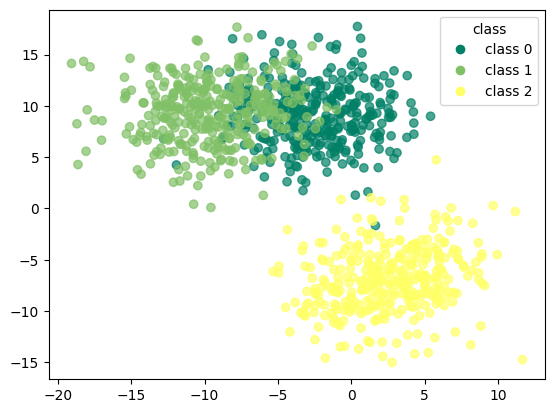

In [211]:
scatter = plt.scatter(df_gmm.iloc[:, 0], df_gmm.iloc[:, 1], 
                      c=df_gmm['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_gmm['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

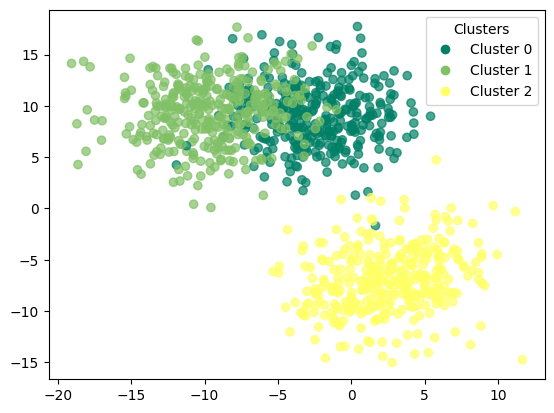

In [212]:
scatter = plt.scatter(df_gmm.iloc[:, 0], df_gmm.iloc[:, 1], 
                      c=df_gmm['gmm'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_gmm['gmm'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [213]:
print(confusion_matrix(df_gmm['target'],df_gmm['gmm']))

[[329   4   0]
 [  3 330   0]
 [  0   0 333]]


In [214]:
print(classification_report(df_gmm['target'],df_gmm['gmm']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.99      0.99      0.99       999
weighted avg       0.99      0.99      0.99       999



### GMM with pca

In [215]:
gmm_pca = GaussianMixture(n_components=3,init_params='k-means++',random_state=42)

In [216]:
gmm_pca.fit(X_pca)

GaussianMixture(init_params='k-means++', n_components=3, random_state=42)

In [217]:
df_pca_gmm = corr_dataset.copy()

In [218]:
df_pca_gmm['gmm_pca'] = gmm_pca.predict(X_pca)

In [219]:
df_pca_gmm

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  gmm_pca  
0    4.323220  2.585761  5.065556       0        2  
1    6.353955  0.137074  7.170266       0        2  
2    8.187964 -0.746995  9.100161       0        2  
3    8.011795 -2.707305  4.126568       0        2  
4    5.900886  3.439981  9.536965       0        2  
..        ...       ...       ...     ...      ...  
994  7.519724  0.239838 -9.269743       2        1  
995  0.480927  3.353072 -8.839961       2        1  
996 -6.534461  7.378898 -5.463060       2        1  
997  2.309382  5.359316 -9.237454       2        1  
998 -0.950249  4.205124 -8.835577       2        1  

[999 rows x 12 columns]

In [220]:
y_true = df_pca_gmm['target'].values  
y_kmeans = df_pca_gmm['gmm_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_gmm['gmm_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_gmm['gmm_pca'] == y_true))

accuracy before: 0.004004004004004004
accuracy after: 0.991991991991992


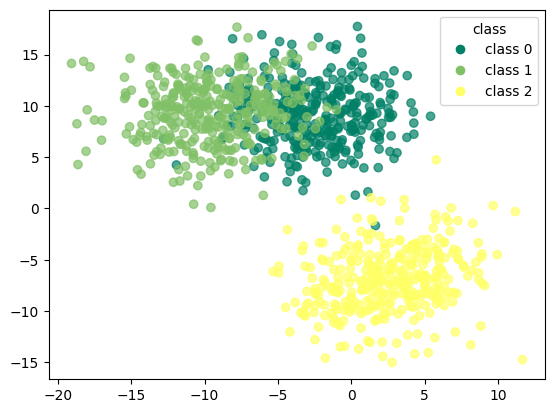

In [221]:
scatter = plt.scatter(df_pca_gmm.iloc[:, 0], df_pca_gmm.iloc[:, 1], 
                      c=df_pca_gmm['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_gmm['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

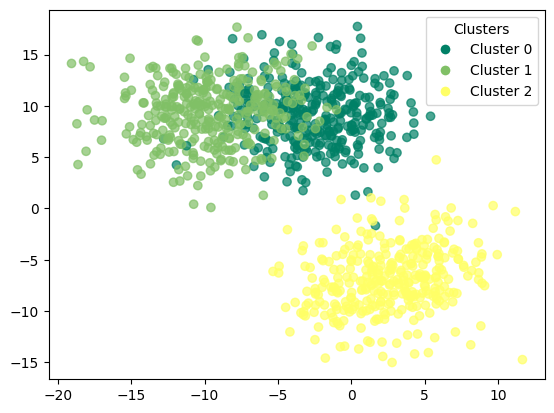

In [222]:
scatter = plt.scatter(df_pca_gmm.iloc[:, 0], df_pca_gmm.iloc[:, 1], 
                      c=df_pca_gmm['gmm_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_gmm['gmm_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [223]:
print(confusion_matrix(df_pca_gmm['target'],df_pca_gmm['gmm_pca']))

[[329   4   0]
 [  4 329   0]
 [  0   0 333]]


In [224]:
print(classification_report(df_pca_gmm['target'],df_pca_gmm['gmm_pca']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.99      0.99      0.99       999
weighted avg       0.99      0.99      0.99       999



### GMM with t-SNE

In [225]:
gmm_tsne = GaussianMixture(n_components=3,init_params='k-means++',random_state=42)

In [226]:
gmm_tsne.fit(X_tsne)

GaussianMixture(init_params='k-means++', n_components=3, random_state=42)

In [227]:
df_tsne_gmm = corr_dataset.copy()

In [228]:
df_tsne_gmm['gmm_tsne'] = gmm_tsne.predict(X_tsne)

In [229]:
df_tsne_gmm

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  gmm_tsne  
0    4.323220  2.585761  5.065556       0         2  
1    6.353955  0.137074  7.170266       0         2  
2    8.187964 -0.746995  9.100161       0         2  
3    8.011795 -2.707305  4.126568       0         2  
4    5.900886  3.439981  9.536965       0         2  
..        ...       ...       ...     ...       ...  
994  7.519724  0.239838 -9.269743       2         1  
995  0.480927  3.353072 -8.839961       2         1  
996 -6.534461  7.378898 -5.463060       2         1  
997  2.309382  5.359316 -9.237454       2         1  
998 -0.950249  4.205124 -8.835577       2         1  

[999 rows x 12 columns]

In [230]:
y_true = df_tsne_gmm['target'].values  
y_kmeans = df_tsne_gmm['gmm_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_gmm['gmm_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_gmm['gmm_tsne'] == y_true))

accuracy before: 0.005005005005005005
accuracy after: 0.991991991991992


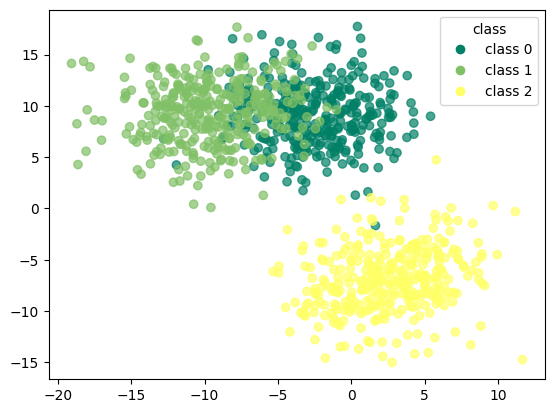

In [231]:
scatter = plt.scatter(df_tsne_gmm.iloc[:, 0], df_tsne_gmm.iloc[:, 1], 
                      c=df_tsne_gmm['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_gmm['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

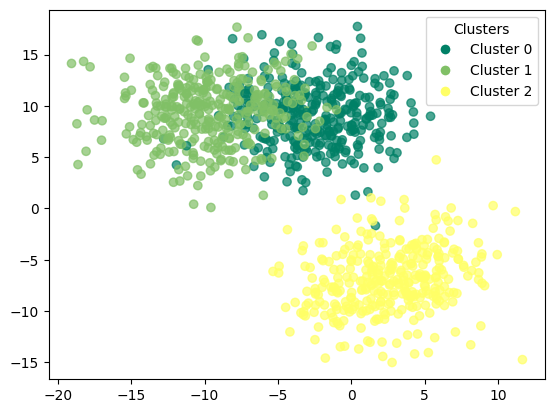

In [232]:
scatter = plt.scatter(df_tsne_gmm.iloc[:, 0], df_tsne_gmm.iloc[:, 1], 
                      c=df_tsne_gmm['gmm_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_gmm['gmm_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [233]:
print(confusion_matrix(df_tsne_gmm['target'],df_tsne_gmm['gmm_tsne']))

[[328   5   0]
 [  3 330   0]
 [  0   0 333]]


In [234]:
print(classification_report(df_tsne_gmm['target'],df_tsne_gmm['gmm_tsne']))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.99      0.99      0.99       999
weighted avg       0.99      0.99      0.99       999



### GMM with umap

In [235]:
gmm_umap = GaussianMixture(n_components=3,init_params='k-means++',random_state=42)

In [236]:
gmm_umap.fit(X_umap)

GaussianMixture(init_params='k-means++', n_components=3, random_state=42)

In [237]:
df_umap_gmm = corr_dataset.copy()

In [238]:
df_umap_gmm['gmm_umap'] = gmm_umap.predict(X_umap)

In [239]:
df_umap_gmm

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  gmm_umap  
0    4.323220  2.585761  5.065556       0         2  
1    6.353955  0.137074  7.170266       0         2  
2    8.187964 -0.746995  9.100161       0         2  
3    8.011795 -2.707305  4.126568       0         2  
4    5.900886  3.439981  9.536965       0         2  
..        ...       ...       ...     ...       ...  
994  7.519724  0.239838 -9.269743       2         1  
995  0.480927  3.353072 -8.839961       2         1  
996 -6.534461  7.378898 -5.463060       2         1  
997  2.309382  5.359316 -9.237454       2         1  
998 -0.950249  4.205124 -8.835577       2         1  

[999 rows x 12 columns]

In [240]:
y_true = df_umap_gmm['target'].values  
y_kmeans = df_umap_gmm['gmm_umap'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_umap_gmm['gmm_umap'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_umap_gmm['gmm_umap'] == y_true))

accuracy before: 0.004004004004004004
accuracy after: 0.992992992992993


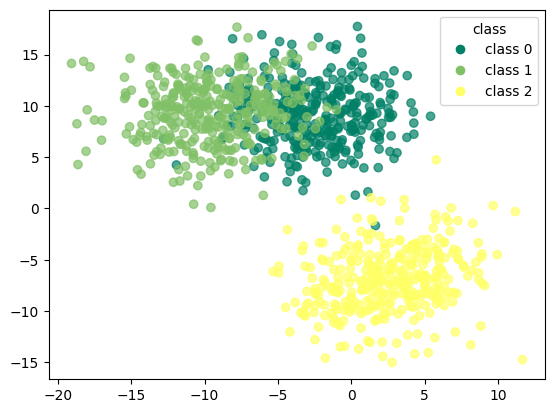

In [241]:
scatter = plt.scatter(df_umap_gmm.iloc[:, 0], df_umap_gmm.iloc[:, 1], 
                      c=df_umap_gmm['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_umap_gmm['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

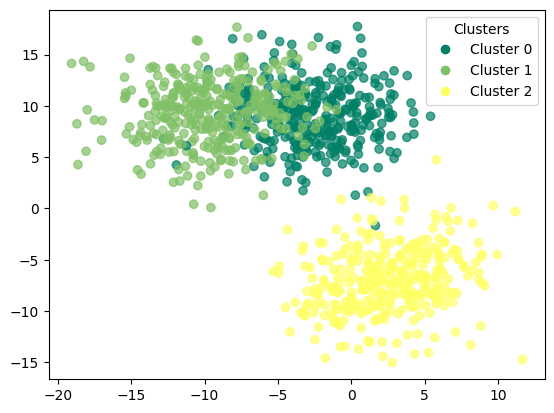

In [242]:
scatter = plt.scatter(df_umap_gmm.iloc[:, 0], df_umap_gmm.iloc[:, 1], 
                      c=df_umap_gmm['gmm_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_gmm['gmm_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [243]:
print(confusion_matrix(df_umap_gmm['target'],df_umap_gmm['gmm_umap']))

[[329   4   0]
 [  3 330   0]
 [  0   0 333]]


In [244]:
print(classification_report(df_umap_gmm['target'],df_umap_gmm['gmm_umap']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.99      0.99      0.99       999
weighted avg       0.99      0.99      0.99       999



## pam

In [245]:
initial_medoids = np.random.choice(len(X_values),3,replace=False)

In [246]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [247]:
pam = kmedoids(X_values,initial_medoids,metric=metric)

In [248]:
pam.process()

In [249]:
clusters = pam.get_clusters()

In [250]:
medoids = pam.get_medoids()

In [251]:
labels = np.zeros(len(X_values))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [252]:
df_pam = corr_dataset.copy()

In [253]:
df_pam['pam'] = labels

In [254]:
df_pam

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  pam  
0    4.323220  2.585761  5.065556       0  0.0  
1    6.353955  0.137074  7.170266       0  0.0  
2    8.187964 -0.746995  9.100161       0  0.0  
3    8.011795 -2.707305  4.126568       0  0.0  
4    5.900886  3.439981  9.536965       0  0.0  
..        ...       ...       ...     ...  ...  
994  7.519724  0.239838 -9.269743       2  1.0  
995  0.480927  3.353072 -8.839961       2  1.0  
996 -6.534461  7.378898 -5.463060       2  1.0  
997  2.309382  5.359316 -9.237454       2  1.0  
998 -0.950249  4.205124 -8.835577       2  1.0  

[999 rows x 12 columns]

In [255]:
y_true = df_pam['target'].values  
y_kmeans = df_pam['pam'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pam['pam'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pam['pam'] == y_true))

accuracy before: 0.3333333333333333
accuracy after: 0.974974974974975


In [256]:
df_pam

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  pam  
0    4.323220  2.585761  5.065556       0    0  
1    6.353955  0.137074  7.170266       0    0  
2    8.187964 -0.746995  9.100161       0    0  
3    8.011795 -2.707305  4.126568       0    0  
4    5.900886  3.439981  9.536965       0    0  
..        ...       ...       ...     ...  ...  
994  7.519724  0.239838 -9.269743       2    2  
995  0.480927  3.353072 -8.839961       2    2  
996 -6.534461  7.378898 -5.463060       2    2  
997  2.309382  5.359316 -9.237454       2    2  
998 -0.950249  4.205124 -8.835577       2    2  

[999 rows x 12 columns]

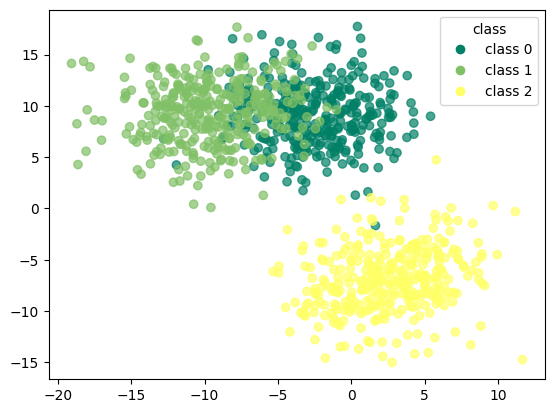

In [257]:
scatter = plt.scatter(df_pam.iloc[:, 0],df_pam.iloc[:, 1], 
                      c=df_pam['target'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam['target'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="class")
plt.show()

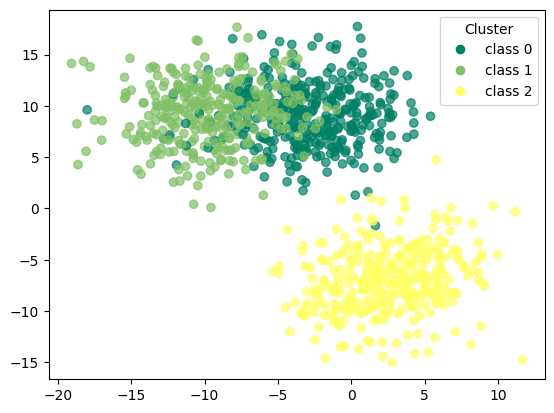

In [258]:
scatter = plt.scatter(df_pam.iloc[:, 0],df_pam.iloc[:, 1], 
                      c=df_pam['pam'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam['pam'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

In [259]:
print(confusion_matrix(df_pam['target'],df_pam['pam']))

[[333   0   0]
 [ 25 308   0]
 [  0   0 333]]


In [260]:
print(classification_report(df_pam['target'],df_pam['pam']))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       333
           1       1.00      0.92      0.96       333
           2       1.00      1.00      1.00       333

    accuracy                           0.97       999
   macro avg       0.98      0.97      0.97       999
weighted avg       0.98      0.97      0.97       999



### pam with pca

In [261]:
initial_medoids = np.random.choice(len(X_pca),3,replace=False)

In [262]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [263]:
pam_pca = kmedoids(X_pca,initial_medoids,metric=metric)

In [264]:
pam_pca.process()

In [265]:
clusters = pam_pca.get_clusters()

In [266]:
medoids = pam_pca.get_medoids()

In [267]:
labels = np.zeros(len(X_pca))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [268]:
df_pam_pca = corr_dataset.copy()

In [269]:
df_pam_pca['pam_pca'] = labels

In [270]:
df_pam_pca

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  pam_pca  
0    4.323220  2.585761  5.065556       0      0.0  
1    6.353955  0.137074  7.170266       0      0.0  
2    8.187964 -0.746995  9.100161       0      0.0  
3    8.011795 -2.707305  4.126568       0      0.0  
4    5.900886  3.439981  9.536965       0      0.0  
..        ...       ...       ...     ...      ...  
994  7.519724  0.239838 -9.269743       2      1.0  
995  0.480927  3.353072 -8.839961       2      1.0  
996 -6.534461  7.378898 -5.463060       2      1.0  
997  2.309382  5.359316 -9.237454       2      1.0  
998 -0.950249  4.205124 -8.835577       2      1.0  

[999 rows x 12 columns]

In [271]:
y_true = df_pam_pca['target'].values  
y_kmeans = df_pam_pca['pam_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pam_pca['pam_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pam_pca['pam_pca'] == y_true))

accuracy before: 0.3303303303303303
accuracy after: 0.993993993993994


In [272]:
df_pam_pca

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  pam_pca  
0    4.323220  2.585761  5.065556       0        0  
1    6.353955  0.137074  7.170266       0        0  
2    8.187964 -0.746995  9.100161       0        0  
3    8.011795 -2.707305  4.126568       0        0  
4    5.900886  3.439981  9.536965       0        0  
..        ...       ...       ...     ...      ...  
994  7.519724  0.239838 -9.269743       2        2  
995  0.480927  3.353072 -8.839961       2        2  
996 -6.534461  7.378898 -5.463060       2        2  
997  2.309382  5.359316 -9.237454       2        2  
998 -0.950249  4.205124 -8.835577       2        2  

[999 rows x 12 columns]

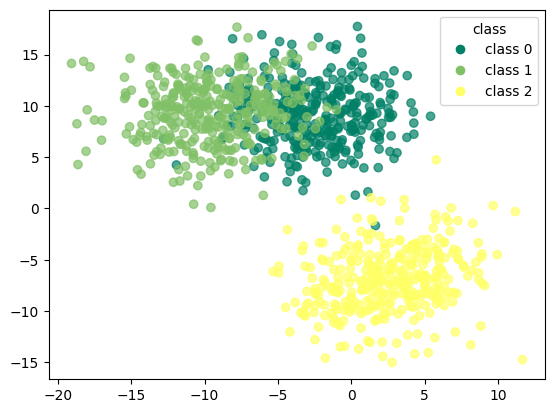

In [273]:
scatter = plt.scatter(df_pam_pca.iloc[:, 0],df_pam_pca.iloc[:, 1], 
                      c=df_pam_pca['target'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_pca['target'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="class")
plt.show()

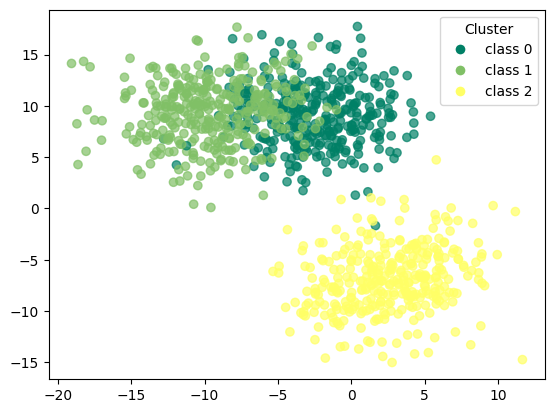

In [274]:
scatter = plt.scatter(df_pam_pca.iloc[:, 0],df_pam_pca.iloc[:, 1], 
                      c=df_pam_pca['pam_pca'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_pca['pam_pca'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

In [275]:
print(confusion_matrix(df_pam_pca['target'],df_pam_pca['pam_pca']))

[[330   3   0]
 [  3 330   0]
 [  0   0 333]]


In [276]:
print(classification_report(df_pam_pca['target'],df_pam_pca['pam_pca']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.99      0.99      0.99       999
weighted avg       0.99      0.99      0.99       999



### pam with t-SNE

In [309]:
initial_medoids = np.random.choice(len(X_pca),3,replace=False)

In [310]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [311]:
pam_tsne = kmedoids(X_tsne,initial_medoids,metric=metric)

In [312]:
pam_tsne.process()

In [313]:
clusters = pam_tsne.get_clusters()

In [314]:
medoids = pam_tsne.get_medoids()

In [315]:
labels = np.zeros(len(X_tsne))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [317]:
df_pam_tsne = corr_dataset.copy()

In [318]:
df_pam_tsne['pam_tsne'] = labels

In [319]:
df_pam_tsne

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  pam_tsne  
0    4.323220  2.585761  5.065556       0       1.0  
1    6.353955  0.137074  7.170266       0       1.0  
2    8.187964 -0.746995  9.100161       0       1.0  
3    8.011795 -2.707305  4.126568       0       1.0  
4    5.900886  3.439981  9.536965       0       1.0  
..        ...       ...       ...     ...       ...  
994  7.519724  0.239838 -9.269743       2       0.0  
995  0.480927  3.353072 -8.839961       2       0.0  
996 -6.534461  7.378898 -5.463060       2       0.0  
997  2.309382  5.359316 -9.237454       2       0.0  
998 -0.950249  4.205124 -8.835577       2       0.0  

[999 rows x 12 columns]

In [320]:
y_true = df_pam_tsne['target'].values  
y_kmeans = df_pam_tsne['pam_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pam_tsne['pam_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pam_tsne['pam_tsne'] == y_true))

accuracy before: 0.003003003003003003
accuracy after: 0.991991991991992


In [321]:
df_pam_tsne

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  pam_tsne  
0    4.323220  2.585761  5.065556       0         0  
1    6.353955  0.137074  7.170266       0         0  
2    8.187964 -0.746995  9.100161       0         0  
3    8.011795 -2.707305  4.126568       0         0  
4    5.900886  3.439981  9.536965       0         0  
..        ...       ...       ...     ...       ...  
994  7.519724  0.239838 -9.269743       2         2  
995  0.480927  3.353072 -8.839961       2         2  
996 -6.534461  7.378898 -5.463060       2         2  
997  2.309382  5.359316 -9.237454       2         2  
998 -0.950249  4.205124 -8.835577       2         2  

[999 rows x 12 columns]

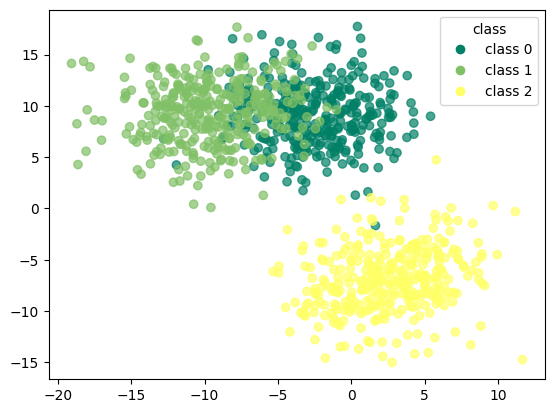

In [322]:
scatter = plt.scatter(df_pam_tsne.iloc[:, 0],df_pam_tsne.iloc[:, 1], 
                      c=df_pam_tsne['target'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_tsne['target'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="class")
plt.show()

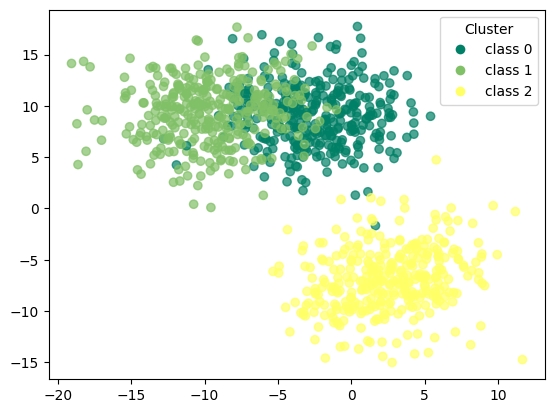

In [323]:
scatter = plt.scatter(df_pam_tsne.iloc[:, 0],df_pam_tsne.iloc[:, 1], 
                      c=df_pam_tsne['pam_tsne'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_tsne['pam_tsne'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

In [324]:
print(confusion_matrix(df_pam_tsne['target'],df_pam_tsne['pam_tsne']))

[[328   5   0]
 [  3 330   0]
 [  0   0 333]]


In [325]:
print(classification_report(df_pam_tsne['target'],df_pam_tsne['pam_tsne']))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.99      0.99      0.99       999
weighted avg       0.99      0.99      0.99       999



### pam with umap

In [326]:
initial_medoids = np.random.choice(len(X_pca),3,replace=False)

In [328]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [329]:
pam_umap = kmedoids(X_umap,initial_medoids,metric=metric)

In [330]:
pam_umap.process()

In [331]:
clusters = pam_umap.get_clusters()

In [332]:
medoids = pam_umap.get_medoids()

In [333]:
labels = np.zeros(len(X_umap))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [334]:
df_pam_umap = corr_dataset.copy()

In [335]:
df_pam_umap['pam_umap'] = labels

In [336]:
df_pam_umap

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  pam_umap  
0    4.323220  2.585761  5.065556       0       0.0  
1    6.353955  0.137074  7.170266       0       0.0  
2    8.187964 -0.746995  9.100161       0       0.0  
3    8.011795 -2.707305  4.126568       0       0.0  
4    5.900886  3.439981  9.536965       0       0.0  
..        ...       ...       ...     ...       ...  
994  7.519724  0.239838 -9.269743       2       1.0  
995  0.480927  3.353072 -8.839961       2       1.0  
996 -6.534461  7.378898 -5.463060       2       1.0  
997  2.309382  5.359316 -9.237454       2       1.0  
998 -0.950249  4.205124 -8.835577       2       1.0  

[999 rows x 12 columns]

In [337]:
y_true = df_pam_umap['target'].values  
y_kmeans = df_pam_umap['pam_umap'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pam_umap['pam_umap'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pam_umap['pam_umap'] == y_true))

accuracy before: 0.32932932932932935
accuracy after: 0.992992992992993


In [338]:
df_pam_umap

vab_1      vab_2      vab_3     vab_4      vab_5     vab_6      vab_7  \
0    2.541562   8.881732   7.252445 -2.785171  -3.409802 -2.850202 -15.529062   
1   -5.048360   7.858162   1.666526  2.203066  -1.996671 -7.859417  -5.622000   
2   -1.656951  10.426735  -0.855219 -0.967172  -4.958404 -7.273106 -12.952449   
3    2.613200  12.229081   8.516412  2.485075  -6.185005 -1.239396  -7.424436   
4   -0.951987  11.265323   4.485583  0.497283 -12.042620 -8.134154 -10.980984   
..        ...        ...        ...       ...        ...       ...        ...   
994 -1.021097  -8.069121  -4.435499  0.135938   2.665557  3.937908  -9.245438   
995 -0.073863  -5.869997  -2.364080 -2.560982   3.252028  3.236956  -6.952139   
996 -1.182153  -5.952933  -4.221021 -3.469638  -0.347425  3.315726  -9.026870   
997  3.801518  -8.478510 -12.206763 -3.622457   0.700439  9.601608  -4.753668   
998  5.587483  -8.558070  -6.807209 -5.138173  -3.802285  8.317761  -7.825111   

        vab_8     vab_9    vab_10  target  pam_umap  
0    4.323220  2.585761  5.065556       0         0  
1    6.353955  0.137074  7.170266       0         0  
2    8.187964 -0.746995  9.100161       0         0  
3    8.011795 -2.707305  4.126568       0         0  
4    5.900886  3.439981  9.536965       0         0  
..        ...       ...       ...     ...       ...  
994  7.519724  0.239838 -9.269743       2         2  
995  0.480927  3.353072 -8.839961       2         2  
996 -6.534461  7.378898 -5.463060       2         2  
997  2.309382  5.359316 -9.237454       2         2  
998 -0.950249  4.205124 -8.835577       2         2  

[999 rows x 12 columns]

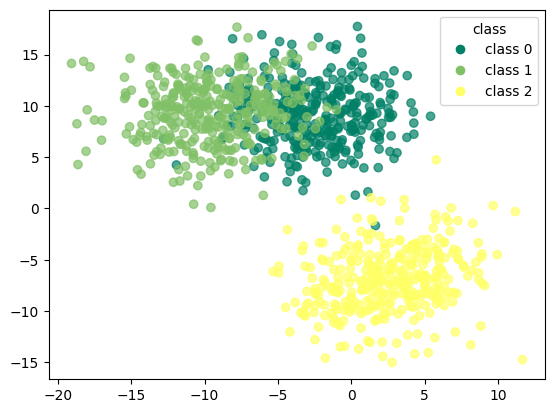

In [339]:
scatter = plt.scatter(df_pam_umap.iloc[:, 0],df_pam_umap.iloc[:, 1], 
                      c=df_pam_umap['target'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_umap['target'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="class")
plt.show()

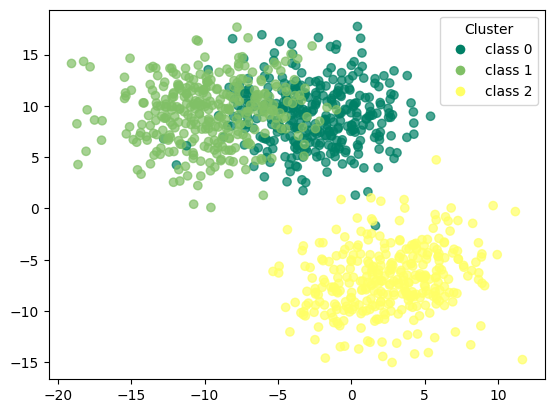

In [340]:
scatter = plt.scatter(df_pam_umap.iloc[:, 0],df_pam_umap.iloc[:, 1], 
                      c=df_pam_umap['pam_umap'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_umap['pam_umap'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

In [341]:
print(confusion_matrix(df_pam_umap['target'],df_pam_umap['pam_umap']))

[[329   4   0]
 [  3 330   0]
 [  0   0 333]]


In [342]:
print(classification_report(df_pam_umap['target'],df_pam_umap['pam_umap']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.99      0.99      0.99       999
weighted avg       0.99      0.99      0.99       999



# overall results k-means

## basic

In [277]:
print(classification_report(df_kmeans['target'],df_kmeans['k_means']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.99      0.99      0.99       999
weighted avg       0.99      0.99      0.99       999



In [278]:
print(confusion_matrix(df_kmeans['target'],df_kmeans['k_means']))

[[330   3   0]
 [  3 330   0]
 [  0   0 333]]


## + pca

In [279]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.99      0.99      0.99       999
weighted avg       0.99      0.99      0.99       999



In [280]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[330   3   0]
 [  3 330   0]
 [  0   0 333]]


## + t-SNE

In [281]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.99      0.99      0.99       999
weighted avg       0.99      0.99      0.99       999



In [282]:
print(confusion_matrix(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

[[328   5   0]
 [  3 330   0]
 [  0   0 333]]


## + UMAP

In [283]:
print(classification_report(df_umap_kmeans['target'],df_umap_kmeans['kmeans_umap'])) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.99      0.99      0.99       999
weighted avg       0.99      0.99      0.99       999



In [284]:
print(confusion_matrix(df_umap_kmeans['target'],df_umap_kmeans['kmeans_umap'])) 

[[329   4   0]
 [  3 330   0]
 [  0   0 333]]


# overall results trimmed k-means

## basic

In [285]:
print(classification_report(df_trim_kmeans['target'],df_trim_kmeans['trim_kmeans']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       308
           1       0.99      0.99      0.99       295
           2       1.00      1.00      1.00       296

    accuracy                           1.00       899
   macro avg       1.00      1.00      1.00       899
weighted avg       1.00      1.00      1.00       899



In [286]:
print(confusion_matrix(df_trim_kmeans['target'],df_trim_kmeans['trim_kmeans']))

[[306   2   0]
 [  2 293   0]
 [  0   0 296]]


## + pca

In [287]:
print(classification_report(df_pca_trim_kmeans['target'],df_pca_trim_kmeans['trim_kmeans_pca']))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       308
           1       0.96      0.96      0.96       295
           2       0.96      1.00      0.98       296

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



In [288]:
print(confusion_matrix(df_pca_trim_kmeans['target'],df_pca_trim_kmeans['trim_kmeans_pca']))

[[296  12   0]
 [  1 283  11]
 [  0   0 296]]


## + t-SNE

In [289]:
print(classification_report(df_tsne_trim_kmeans['target'],df_tsne_trim_kmeans['trim_kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       308
           1       0.99      0.94      0.97       295
           2       0.95      1.00      0.97       296

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899



In [290]:
print(confusion_matrix(df_tsne_trim_kmeans['target'],df_tsne_trim_kmeans['trim_kmeans_tsne'])) 

[[306   2   0]
 [  1 277  17]
 [  0   0 296]]


## + UMAP

In [291]:
print(classification_report(df_umap_trim_kmeans['target'],df_umap_trim_kmeans['trim_kmeans_umap'])) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       294
           1       1.00      1.00      1.00       300
           2       1.00      1.00      1.00       305

    accuracy                           1.00       899
   macro avg       1.00      1.00      1.00       899
weighted avg       1.00      1.00      1.00       899



In [292]:
print(confusion_matrix(df_umap_trim_kmeans['target'],df_umap_trim_kmeans['trim_kmeans_umap'])) 

[[293   1   0]
 [  1 299   0]
 [  0   0 305]]


# overall results dbscan

## basic

In [293]:
print(classification_report(df_dbscan['target'],df_dbscan['dbscan']))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00     333.0
           1       0.00      0.00      0.00     333.0
           2       0.00      0.00      0.00     333.0

    accuracy                           0.00     999.0
   macro avg       0.00      0.00      0.00     999.0
weighted avg       0.00      0.00      0.00     999.0



In [294]:
print(confusion_matrix(df_dbscan['target'],df_dbscan['dbscan']))

[[  0   0   0   0]
 [333   0   0   0]
 [333   0   0   0]
 [333   0   0   0]]


## + pca

In [295]:
print(classification_report(df_pca_dbscan['target'],df_pca_dbscan['dbscan_pca']))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00     333.0
           1       0.00      0.00      0.00     333.0
           2       0.00      0.00      0.00     333.0

    accuracy                           0.00     999.0
   macro avg       0.00      0.00      0.00     999.0
weighted avg       0.00      0.00      0.00     999.0



In [296]:
print(confusion_matrix(df_pca_dbscan['target'],df_pca_dbscan['dbscan_pca']))

[[  0   0   0   0]
 [ 15   0   0 318]
 [ 16   0   0 317]
 [ 17   0 316   0]]


## + t-SNE

In [297]:
print(classification_report(df_tsne_dbscan['target'],df_tsne_dbscan['dbscan_tsne']))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      0.98      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.75      0.74      0.74       999
weighted avg       0.99      0.99      0.99       999



In [298]:
print(confusion_matrix(df_tsne_dbscan['target'],df_tsne_dbscan['dbscan_tsne']))

[[  0   0   0   0]
 [  3 325   5   0]
 [  3   1 329   0]
 [  0   0   0 333]]


## + UMAP

In [299]:
print(classification_report(df_umap_dbscan['target'],df_umap_dbscan['dbscan_umap']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.99      0.99      0.99       999
weighted avg       0.99      0.99      0.99       999



In [300]:
print(confusion_matrix(df_umap_dbscan['target'],df_umap_dbscan['dbscan_umap']))

[[329   4   0]
 [  3 330   0]
 [  0   0 333]]


# overall results GMM

## basic

In [301]:
print(classification_report(df_gmm['target'],df_gmm['gmm']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.99      0.99      0.99       999
weighted avg       0.99      0.99      0.99       999



In [302]:
print(confusion_matrix(df_gmm['target'],df_gmm['gmm']))

[[329   4   0]
 [  3 330   0]
 [  0   0 333]]


## + pca

In [303]:
print(classification_report(df_pca_gmm['target'],df_pca_gmm['gmm_pca']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.99      0.99      0.99       999
weighted avg       0.99      0.99      0.99       999



In [304]:
print(confusion_matrix(df_pca_gmm['target'],df_pca_gmm['gmm_pca']))

[[329   4   0]
 [  4 329   0]
 [  0   0 333]]


## + t-SNE

In [305]:
print(classification_report(df_tsne_gmm['target'],df_tsne_gmm['gmm_tsne']))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.99      0.99      0.99       999
weighted avg       0.99      0.99      0.99       999



In [306]:
print(confusion_matrix(df_tsne_gmm['target'],df_tsne_gmm['gmm_tsne']))

[[328   5   0]
 [  3 330   0]
 [  0   0 333]]


## + UMAP

In [307]:
print(classification_report(df_umap_gmm['target'],df_umap_gmm['gmm_umap']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.99      0.99      0.99       999
weighted avg       0.99      0.99      0.99       999



In [308]:
print(confusion_matrix(df_umap_gmm['target'],df_umap_gmm['gmm_umap']))

[[329   4   0]
 [  3 330   0]
 [  0   0 333]]


# overall results pam

## basic

In [343]:
print(confusion_matrix(df_pam['target'],df_pam['pam']))

[[333   0   0]
 [ 25 308   0]
 [  0   0 333]]


In [344]:
print(classification_report(df_pam['target'],df_pam['pam']))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       333
           1       1.00      0.92      0.96       333
           2       1.00      1.00      1.00       333

    accuracy                           0.97       999
   macro avg       0.98      0.97      0.97       999
weighted avg       0.98      0.97      0.97       999



## + pca

In [346]:
print(confusion_matrix(df_pam_pca['target'],df_pam_pca['pam_pca']))

[[330   3   0]
 [  3 330   0]
 [  0   0 333]]


In [347]:
print(classification_report(df_pam_pca['target'],df_pam_pca['pam_pca']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.99      0.99      0.99       999
weighted avg       0.99      0.99      0.99       999



## + t-SNE

In [348]:
print(confusion_matrix(df_pam_tsne['target'],df_pam_tsne['pam_tsne']))

[[328   5   0]
 [  3 330   0]
 [  0   0 333]]


In [349]:
print(classification_report(df_pam_tsne['target'],df_pam_tsne['pam_tsne']))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.99      0.99      0.99       999
weighted avg       0.99      0.99      0.99       999



## + umap

In [350]:
print(confusion_matrix(df_pam_umap['target'],df_pam_umap['pam_umap']))

[[329   4   0]
 [  3 330   0]
 [  0   0 333]]


In [352]:
print(classification_report(df_pam_umap['target'],df_pam_umap['pam_umap']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.99      0.99      0.99       333
           2       1.00      1.00      1.00       333

    accuracy                           0.99       999
   macro avg       0.99      0.99      0.99       999
weighted avg       0.99      0.99      0.99       999

